fatality rate?  total infections? total deaths?


model: fatalities?  (estimate from curves.. when do get peak, how much time has elapsed?)
infection rate?

data:
+ https://github.com/govex/COVID-19
+ https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series
+ https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv (used by Johns Hopkins; county-level)


In [2]:
import pandas as pd
import datetime
import rpy2.robjects as robjects

In [3]:
pd.set_option('display.precision', 1)
data = pd.read_csv("data/combined_data.csv")

In [4]:
data.head()

,Unnamed: 0,household_size,empl_agriculture,empl_professional,empl_social,empl_services,empl_manufacturing,empl_retail,employed,prc_fam_poverty,...,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,ten plus cases
0,0,2.6,1.1,11.2,19.4,8.3,22.2,10.2,53742,9.9,...,0,0,0,0,0,0,0.0,0,0,3/28/20
1,1,3.1,14.8,7.4,21.6,8.9,7.1,9.3,52644,15.6,...,0,0,0,0,1,1,1.0,1,1,4/12/20
2,2,3.3,16.0,10.1,19.7,10.9,6.5,9.0,190707,10.5,...,2,2,3,3,3,3,3.0,3,3,3/21/20
3,3,2.4,1.3,16.4,20.7,11.5,3.5,10.6,44505,5.1,...,1,1,1,1,1,1,1.0,1,1,3/28/20
4,4,2.6,1.1,9.4,25.5,11.5,4.4,12.9,69649,9.5,...,3,3,3,3,3,3,3.0,3,3,4/3/20


In [5]:
data[(data["county"] == "New York County") | (data["county"] == "Alameda County")].iloc[:,[1,2,3,4,5,6,7, 9,10, 11, 12, 13, 14, 15, 95, 105, 106, 107, 108]]

,household_size,empl_agriculture,empl_professional,empl_social,empl_services,empl_manufacturing,empl_retail,prc_fam_poverty,avg_income,prc_public_transp,population,pop_65_plus,health_ins,county,4/4/20,4/14/20,4/15/20,4/16/20,ten plus cases
337,2.8,0.5,20.4,21.8,8.2,9.7,8.6,5.1,48595,15.7,1666753,13.8,99.5,Alameda County,12,23.0,36,39,3/14/20
489,2.1,0.1,21.6,23.2,10.4,2.5,6.5,12.1,74911,59.9,1628701,16.5,99.3,New York County,2630,7905.0,8455,11477,3/6/20


In [6]:
data.columns.values

array(['Unnamed: 0', 'household_size', 'empl_agriculture',
       'empl_professional', 'empl_social', 'empl_services',
       'empl_manufacturing', 'empl_retail', 'employed', 'prc_fam_poverty',
       'avg_income', 'prc_public_transp', 'population', 'pop_65_plus',
       'health_ins', 'county', 'state', 'FIPS', 'area',
       'domestic_passengers', 'intl_passengers', 'order started',
       '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20',
       '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20',
       '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20',
       '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20',
       '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20',
       '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20',
       '3/10/20', '3/11/20', '3/12/20', '3/13/2

### transform the data

+ convert "ten plus cases" into days since 10+ cases detected
+ convert "order started" into days since order started
+ add population density

In [7]:
days_elapsed = list()

for x in range(data.shape[0]):
    dt = datetime.datetime.strptime(data.iloc[x]["ten plus cases"], "%m/%d/%y")
    days_elapsed.append((datetime.date.today() - dt.date()).days)

In [8]:
data["days since 10+"] = days_elapsed

In [9]:
data = data.drop(["Unnamed: 0", "ten plus cases"], axis=1)

In [10]:
data.head()

,household_size,empl_agriculture,empl_professional,empl_social,empl_services,empl_manufacturing,empl_retail,employed,prc_fam_poverty,avg_income,...,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,days since 10+
0,2.6,1.1,11.2,19.4,8.3,22.2,10.2,53742,9.9,27742,...,0,0,0,0,0,0,0.0,0,0,20
1,3.1,14.8,7.4,21.6,8.9,7.1,9.3,52644,15.6,22628,...,0,0,0,0,1,1,1.0,1,1,5
2,3.3,16.0,10.1,19.7,10.9,6.5,9.0,190707,10.5,30674,...,2,2,3,3,3,3,3.0,3,3,27
3,2.4,1.3,16.4,20.7,11.5,3.5,10.6,44505,5.1,37645,...,1,1,1,1,1,1,1.0,1,1,20
4,2.6,1.1,9.4,25.5,11.5,4.4,12.9,69649,9.5,28144,...,3,3,3,3,3,3,3.0,3,3,14


In [11]:
days_elapsed = list()

for x in range(data.shape[0]):
    order = data.iloc[x]["order started"]
    if type(order) == str:
        dt = datetime.datetime.strptime(order, "%m/%d/%y")
        days_elapsed.append((datetime.date.today() - dt.date()).days)
    else:
        days_elapsed.append(0)

In [12]:
data["days since order"] = days_elapsed

In [13]:
data.describe()

,household_size,empl_agriculture,empl_professional,empl_social,empl_services,empl_manufacturing,empl_retail,employed,prc_fam_poverty,avg_income,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,days since 10+,days since order
count,827.0,8.3e+02,8.3e+02,8.3e+02,8.3e+02,8.3e+02,8.3e+02,8.3e+02,827.0,827.0,...,827.0,827.0,827.0,827.0,827.0,827.0,827.0,827.0,827.0,827.0
mean,2.6,-5.0e+03,-5.0e+03,-5.0e+03,-5.0e+03,-5.0e+03,-5.0e+03,1.6e+05,9.0,32026.4,...,18.6,20.9,23.3,25.2,26.9,29.4,32.5,37.9,21.6,19.1
std,0.3,1.4e+05,1.4e+05,1.4e+05,1.4e+05,1.4e+05,1.4e+05,2.9e+05,4.2,7871.9,...,184.3,208.5,228.2,247.2,263.5,283.8,304.0,407.4,8.1,6.9
min,1.9,-4.2e+06,-4.2e+06,-4.2e+06,-4.2e+06,-4.2e+06,-4.2e+06,1.8e+04,1.3,14605.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.4,5.4e-01,7.7e+00,2.1e+01,8.0e+00,6.7e+00,1.0e+01,4.4e+04,5.9,26839.5,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,17.0,15.0
50%,2.5,1.0e+00,9.6e+00,2.3e+01,9.3e+00,1.0e+01,1.1e+01,7.5e+04,8.4,30614.0,...,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,22.0,18.0
75%,2.7,2.3e+00,1.2e+01,2.6e+01,1.1e+01,1.4e+01,1.3e+01,1.7e+05,11.4,35698.0,...,7.0,7.0,8.0,9.0,9.0,10.0,11.0,12.5,27.0,25.0
max,4.1,2.6e+01,3.0e+01,4.6e+01,3.2e+01,4.4e+01,2.1e+01,5.0e+06,29.4,74911.0,...,5150.0,5820.0,6367.0,6898.0,7349.0,7905.0,8455.0,11477.0,46.0,31.0


In [14]:
data = data.drop(["order started"], axis=1)

In [34]:
data["pop density"] = data["population"] / data["area"]

In [35]:
data.describe()

,household_size,empl_agriculture,empl_professional,empl_social,empl_services,empl_manufacturing,empl_retail,employed,prc_fam_poverty,avg_income,...,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,days since 10+,days since order,pop density
count,827.0,8.3e+02,8.3e+02,8.3e+02,8.3e+02,8.3e+02,8.3e+02,8.3e+02,827.0,827.0,...,827.0,827.0,827.0,827.0,827.0,827.0,827.0,827.0,827.0,827.0
mean,2.6,-5.0e+03,-5.0e+03,-5.0e+03,-5.0e+03,-5.0e+03,-5.0e+03,1.6e+05,9.0,32026.4,...,20.9,23.3,25.2,26.9,29.4,32.5,37.9,21.6,19.1,850.3
std,0.3,1.4e+05,1.4e+05,1.4e+05,1.4e+05,1.4e+05,1.4e+05,2.9e+05,4.2,7871.9,...,208.5,228.2,247.2,263.5,283.8,304.0,407.4,8.1,6.9,3387.7
min,1.9,-4.2e+06,-4.2e+06,-4.2e+06,-4.2e+06,-4.2e+06,-4.2e+06,1.8e+04,1.3,14605.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.4
25%,2.4,5.4e-01,7.7e+00,2.1e+01,8.0e+00,6.7e+00,1.0e+01,4.4e+04,5.9,26839.5,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,17.0,15.0,140.5
50%,2.5,1.0e+00,9.6e+00,2.3e+01,9.3e+00,1.0e+01,1.1e+01,7.5e+04,8.4,30614.0,...,2.0,2.0,2.0,2.0,3.0,3.0,3.0,22.0,18.0,271.9
75%,2.7,2.3e+00,1.2e+01,2.6e+01,1.1e+01,1.4e+01,1.3e+01,1.7e+05,11.4,35698.0,...,7.0,8.0,9.0,9.0,10.0,11.0,12.5,27.0,25.0,569.1
max,4.1,2.6e+01,3.0e+01,4.6e+01,3.2e+01,4.4e+01,2.1e+01,5.0e+06,29.4,74911.0,...,5820.0,6367.0,6898.0,7349.0,7905.0,8455.0,11477.0,46.0,31.0,71340.4


### Examine Data

In [36]:
data.loc[data["days since 10+"] > 40, ["county", "4/16/20", 'household_size', 
                                       'pop density', 'prc_fam_poverty', 'avg_income',
                                       'prc_public_transp', 'population', 'pop_65_plus', 
                                       'health_ins', 'area', 'domestic_passengers', 
                                       'intl_passengers', "days since 10+", "days since order"]]

,county,4/16/20,household_size,pop density,prc_fam_poverty,avg_income,prc_public_transp,population,pop_65_plus,health_ins,area,domestic_passengers,intl_passengers,days since 10+,days since order
113,Santa Clara County,69,3.0,1501.9,4.1,58588,4.1,1937570,13.5,99.5,1290.1,33736000,7714000,45,31
217,King County,312,2.5,1055.6,5.5,52804,14.6,2233163,13.2,99.4,2115.6,21381000,2595600,46,25
235,Los Angeles County,457,3.0,2490.3,10.5,34115,5.7,10105518,13.6,99.3,4057.9,42057000,12570600,43,29
489,New York County,11477,2.1,71340.4,12.1,74911,59.9,1628701,16.5,99.3,22.8,44647000,24424000,42,26
691,Westchester County,668,2.7,2247.6,5.3,56893,22.8,967612,17.1,98.7,430.5,28929000,17743200,44,26
822,Snohomish County,86,2.7,390.4,5.2,39500,5.9,814901,13.5,98.8,2087.3,0,0,43,25


In [37]:
data.loc[data["4/16/20"] > 700, ["county", "4/16/20", 'household_size', 
                                       'pop density', 'prc_fam_poverty', 'avg_income',
                                       'prc_public_transp', 'population', 'pop_65_plus', 
                                       'health_ins', 'area', 'domestic_passengers', 
                                       'intl_passengers', "days since 10+", "days since order"]]

,county,4/16/20,household_size,pop density,prc_fam_poverty,avg_income,prc_public_transp,population,pop_65_plus,health_ins,area,domestic_passengers,intl_passengers,days since 10+,days since order
287,Nassau County,1109,3.0,4770.8,4.1,50397,17.3,1358343,17.8,99.3,284.7,28745000,17574400,39,26
357,Cook County,722,2.6,5480.1,10.2,37538,19.1,5180493,14.6,99.1,945.3,43405000,7100700,38,27
489,New York County,11477,2.1,71340.4,12.1,74911,59.9,1628701,16.5,99.3,22.8,44647000,24424000,42,26
574,Wayne County,884,2.5,2865.5,16.6,26988,2.5,1753893,15.4,99.3,612.1,15550999,1861100,32,24


In [38]:
data.loc[data["4/16/20"] < 200, ["county", "4/16/20", 'household_size', 
                                       'pop density', 'prc_fam_poverty', 'avg_income',
                                       'prc_public_transp', 'population', 'pop_65_plus', 
                                       'health_ins', 'area', 'domestic_passengers', 
                                       'intl_passengers', "days since 10+", "days since order"]]

,county,4/16/20,household_size,pop density,prc_fam_poverty,avg_income,prc_public_transp,population,pop_65_plus,health_ins,area,domestic_passengers,intl_passengers,days since 10+,days since order
0,Morgan County,0,2.6,205.6,9.9,27742,0.4,119089,17.2,98.8,579.3,580000,0,20,13
1,Kings County,1,3.1,108.9,15.6,22628,0.5,151366,10.2,90.1,1389.4,0,0,5,29
2,Monterey County,3,3.3,132.8,10.5,30674,1.3,435594,13.7,96.3,3280.6,186000,0,27,29
3,Nevada County,1,2.4,104.1,5.1,37645,0.1,99696,27.8,98.8,957.8,0,0,20,29
4,Shasta County,3,2.6,47.7,9.5,28144,0.8,180040,20.6,99.2,3775.4,0,0,14,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,Snohomish County,86,2.7,390.4,5.2,39500,5.9,814901,13.5,98.8,2087.3,0,0,43,25
823,Jefferson County,0,2.5,153.0,6.4,33545,0.1,85129,17.2,99.3,556.5,1034000,0,18,23
824,Milwaukee County,114,2.4,3927.9,14.1,28641,4.2,948201,13.6,99.0,241.4,3421000,0,32,23
825,Outagamie County,2,2.5,293.9,5.4,32489,0.5,187365,14.7,99.3,637.5,654000,0,17,23


In [17]:
%load_ext rpy2.ipython

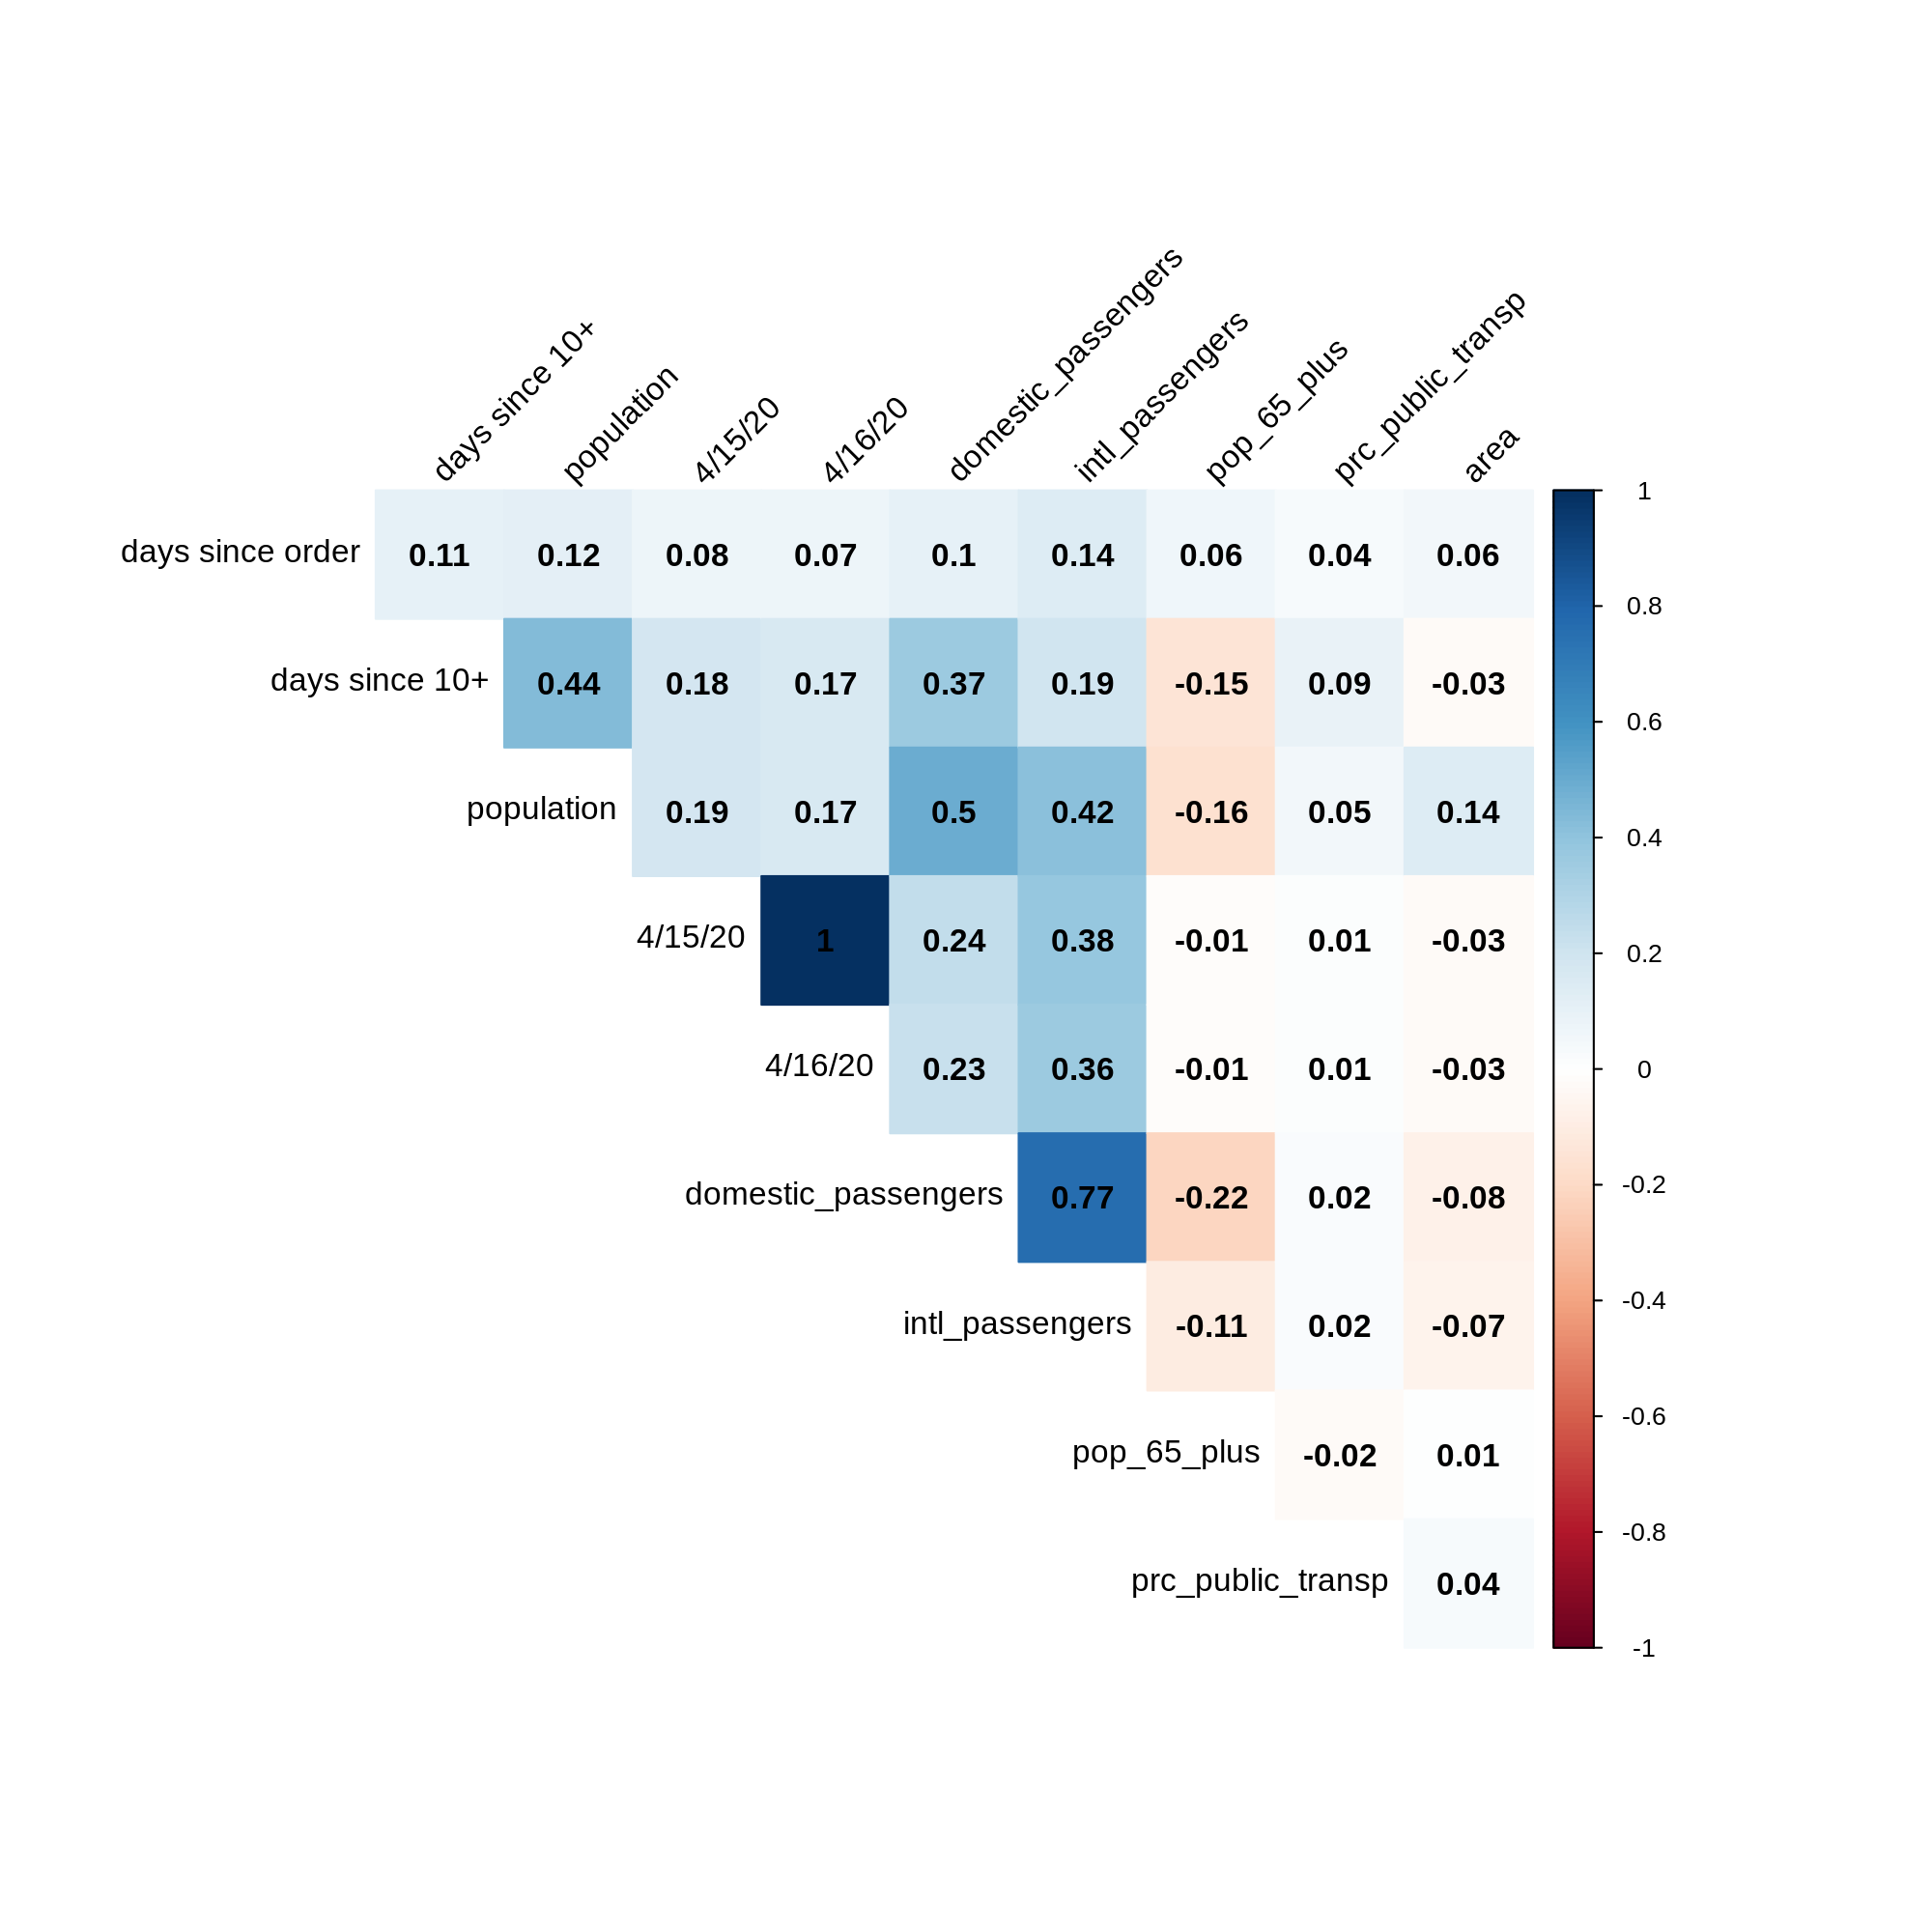

In [42]:
%%R -i data -w 10 -h 10 --units in -r 200

library(corrplot)
corr = cor(data[c("days since 10+", "days since order", "population", "pop_65_plus", "domestic_passengers", "intl_passengers", "prc_public_transp", "4/15/20", "4/16/20", "area")])
corrplot(corr, method="color", type="upper", order="hclust", 
         addCoef.col = "black", # Add coefficient of correlation
         tl.col="black", tl.srt=45, #Text label color and rotation
         # hide correlation coefficient on the principal diagonal
         diag=FALSE 
         )

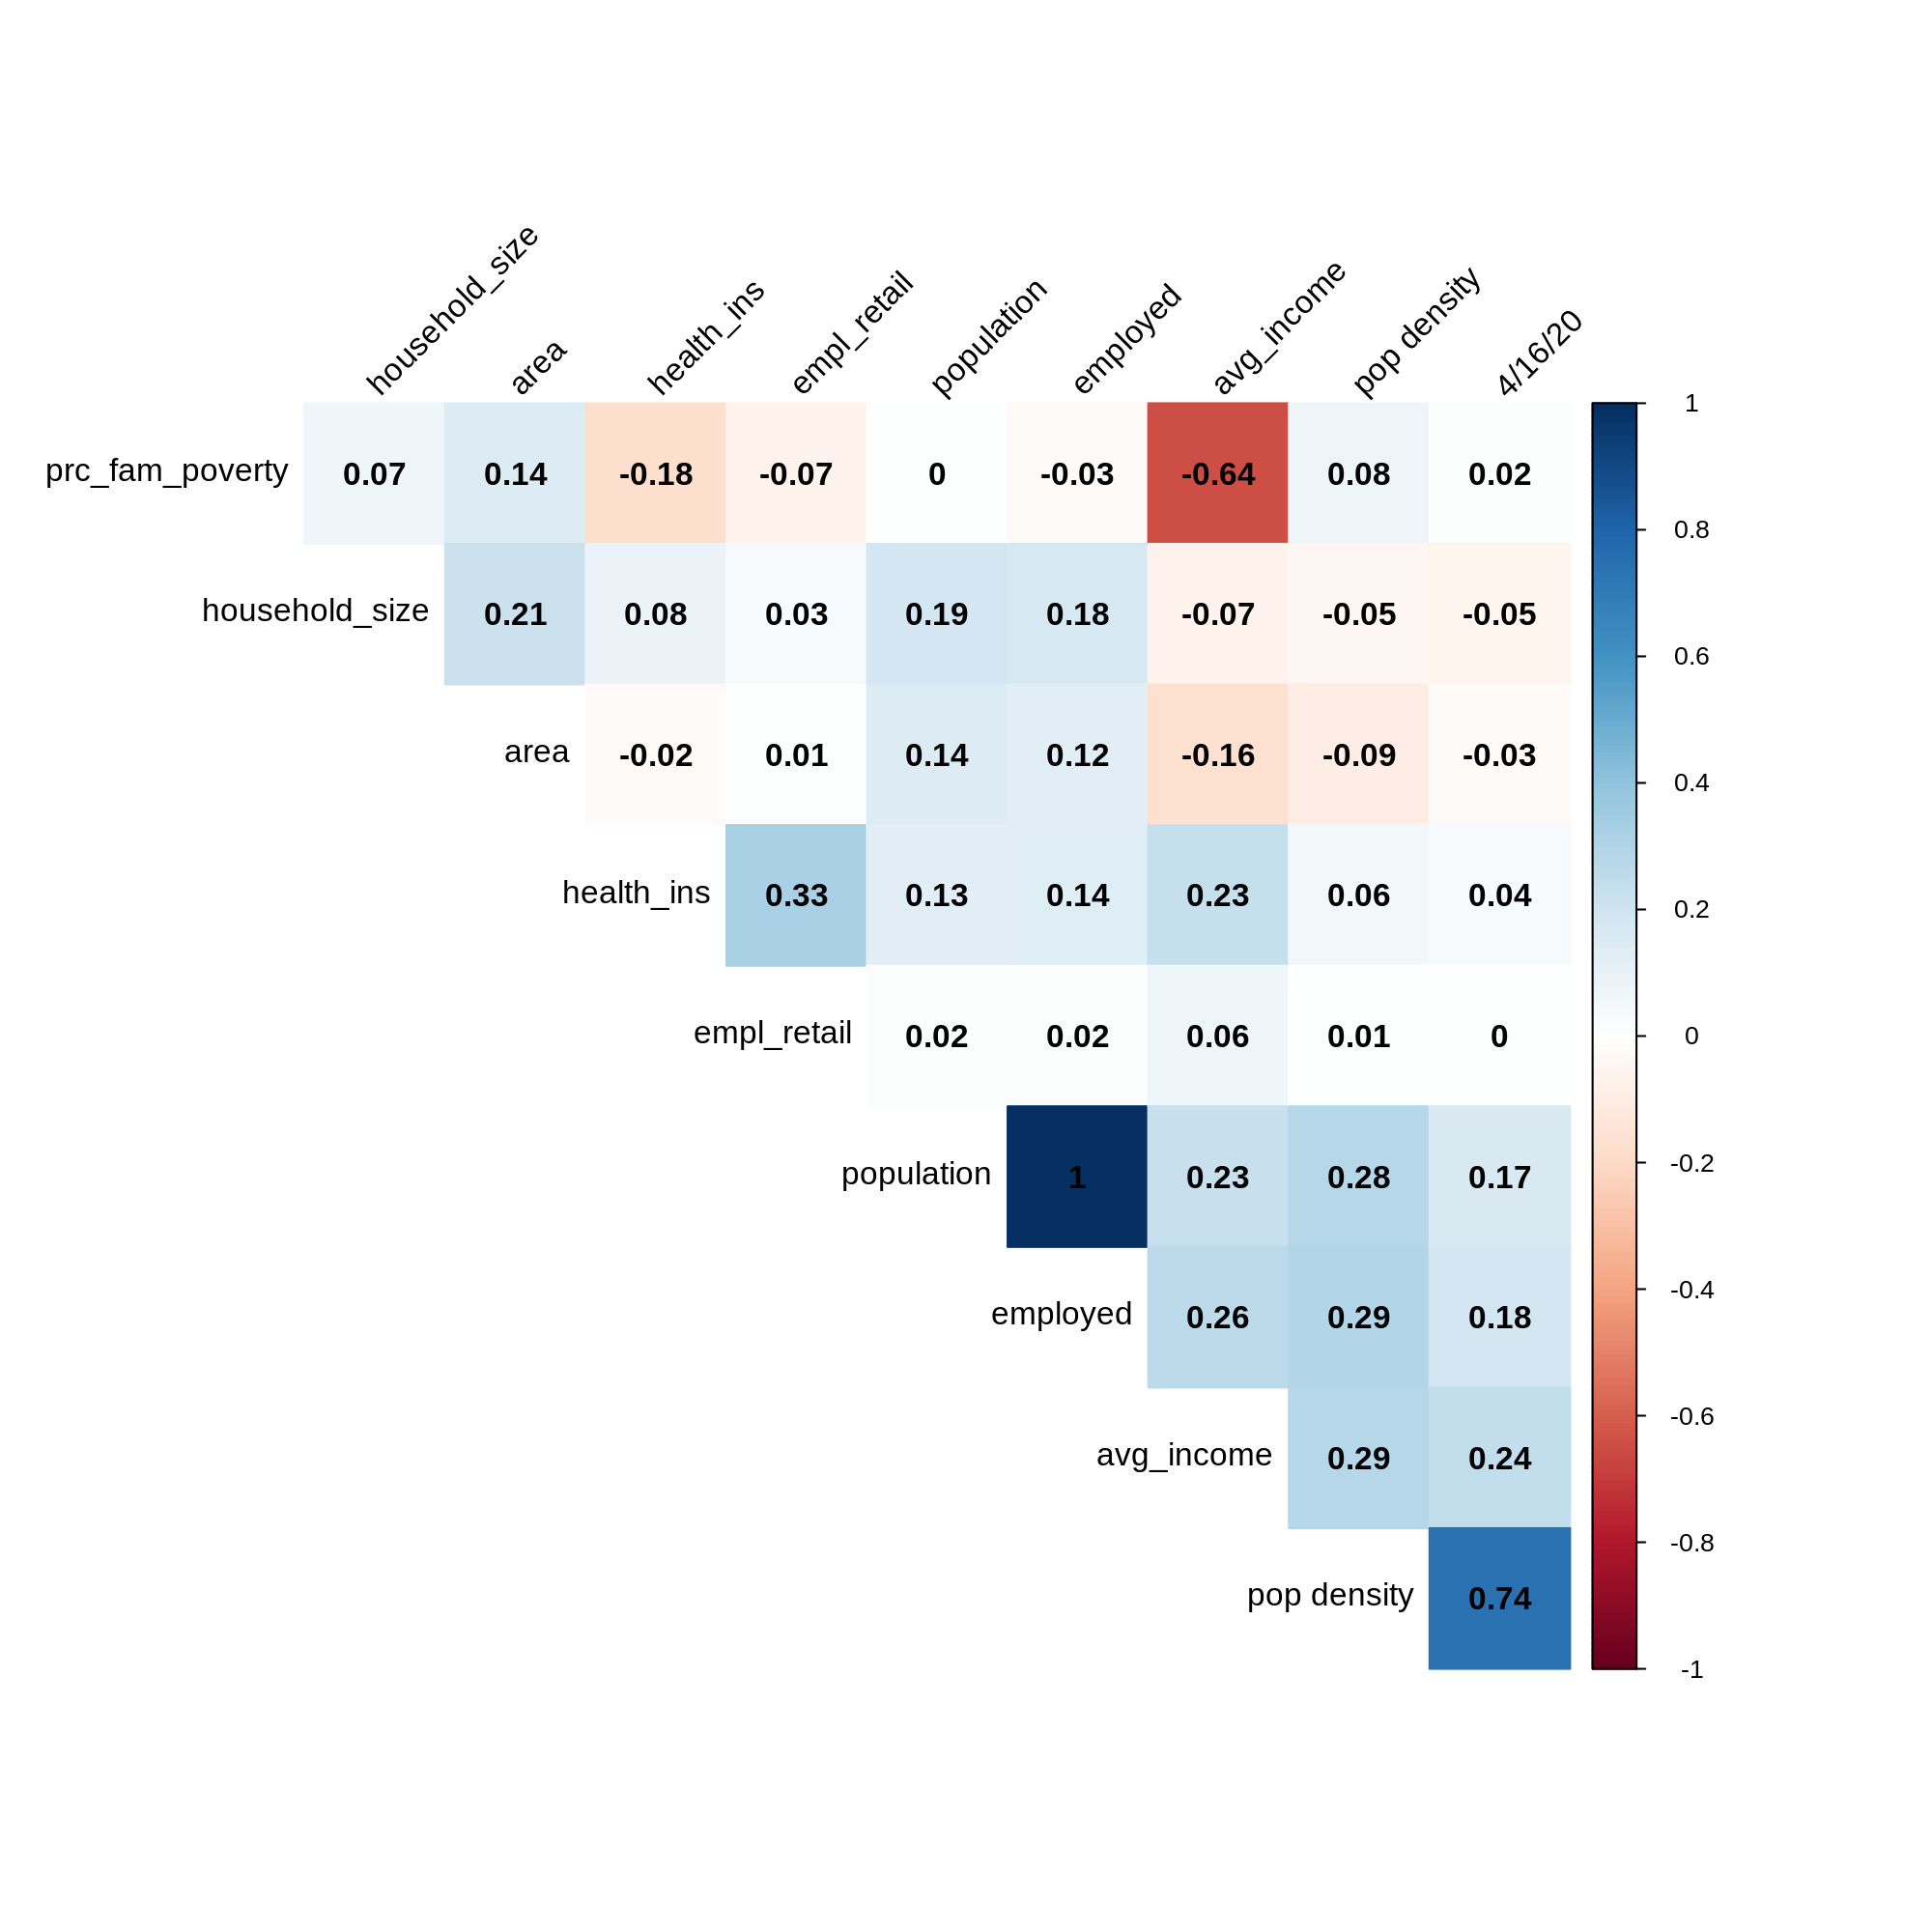

In [47]:
%%R -w 10 -h 10 --units in -r 200
# c("days since 10+", "days since order", "population", "pop_65_plus", 
# "domestic_passengers", "intl_passengers", "prc_public_transp", "4/16/20", "area")
library(corrplot)
corr = cor(data[c('household_size', "pop density", "area", "population", "health_ins",
       'empl_retail', 'employed', 'prc_fam_poverty', 'avg_income', "4/16/20")])
corrplot(corr, method="color", type="upper", order="hclust", 
         addCoef.col = "black", # Add coefficient of correlation
         tl.col="black", tl.srt=45, #Text label color and rotation
         # hide correlation coefficient on the principal diagonal
         diag=FALSE 
         )

# populations denisty correlates very much (positively) with # deaths

In [18]:
%%R
# load the ggplot2 library
library(ggplot2)

In [49]:
data.columns.values

array(['household_size', 'empl_agriculture', 'empl_professional',
       'empl_social', 'empl_services', 'empl_manufacturing',
       'empl_retail', 'employed', 'prc_fam_poverty', 'avg_income',
       'prc_public_transp', 'population', 'pop_65_plus', 'health_ins',
       'county', 'state', 'FIPS', 'area', 'domestic_passengers',
       'intl_passengers', '1/22/20', '1/23/20', '1/24/20', '1/25/20',
       '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20',
       '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20',
       '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20',
       '3/14/20', '3/15/20', '3/16

In [234]:
abbrev = data.drop(['1/22/20', '1/23/20', '1/24/20', '1/25/20',
       '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20',
       '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20',
       '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20',
       '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20',
       '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20',
       '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20',
       '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20',
       '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20',
       '4/13/20', '4/14/20', '4/15/20', "employed", "FIPS"], axis=1)

In [235]:
abbrev.head()

,household_size,empl_agriculture,empl_professional,empl_social,empl_services,empl_manufacturing,empl_retail,prc_fam_poverty,avg_income,prc_public_transp,...,health_ins,county,state,area,domestic_passengers,intl_passengers,4/16/20,days since 10+,days since order,pop density
0,2.6,1.1,11.2,19.4,8.3,22.2,10.2,9.9,27742,0.4,...,98.8,Morgan County,AL,579.3,580000,0,0,20,13,205.6
1,3.1,14.8,7.4,21.6,8.9,7.1,9.3,15.6,22628,0.5,...,90.1,Kings County,CA,1389.4,0,0,1,5,29,108.9
2,3.3,16.0,10.1,19.7,10.9,6.5,9.0,10.5,30674,1.3,...,96.3,Monterey County,CA,3280.6,186000,0,3,27,29,132.8
3,2.4,1.3,16.4,20.7,11.5,3.5,10.6,5.1,37645,0.1,...,98.8,Nevada County,CA,957.8,0,0,1,20,29,104.1
4,2.6,1.1,9.4,25.5,11.5,4.4,12.9,9.5,28144,0.8,...,99.2,Shasta County,CA,3775.4,0,0,3,14,29,47.7


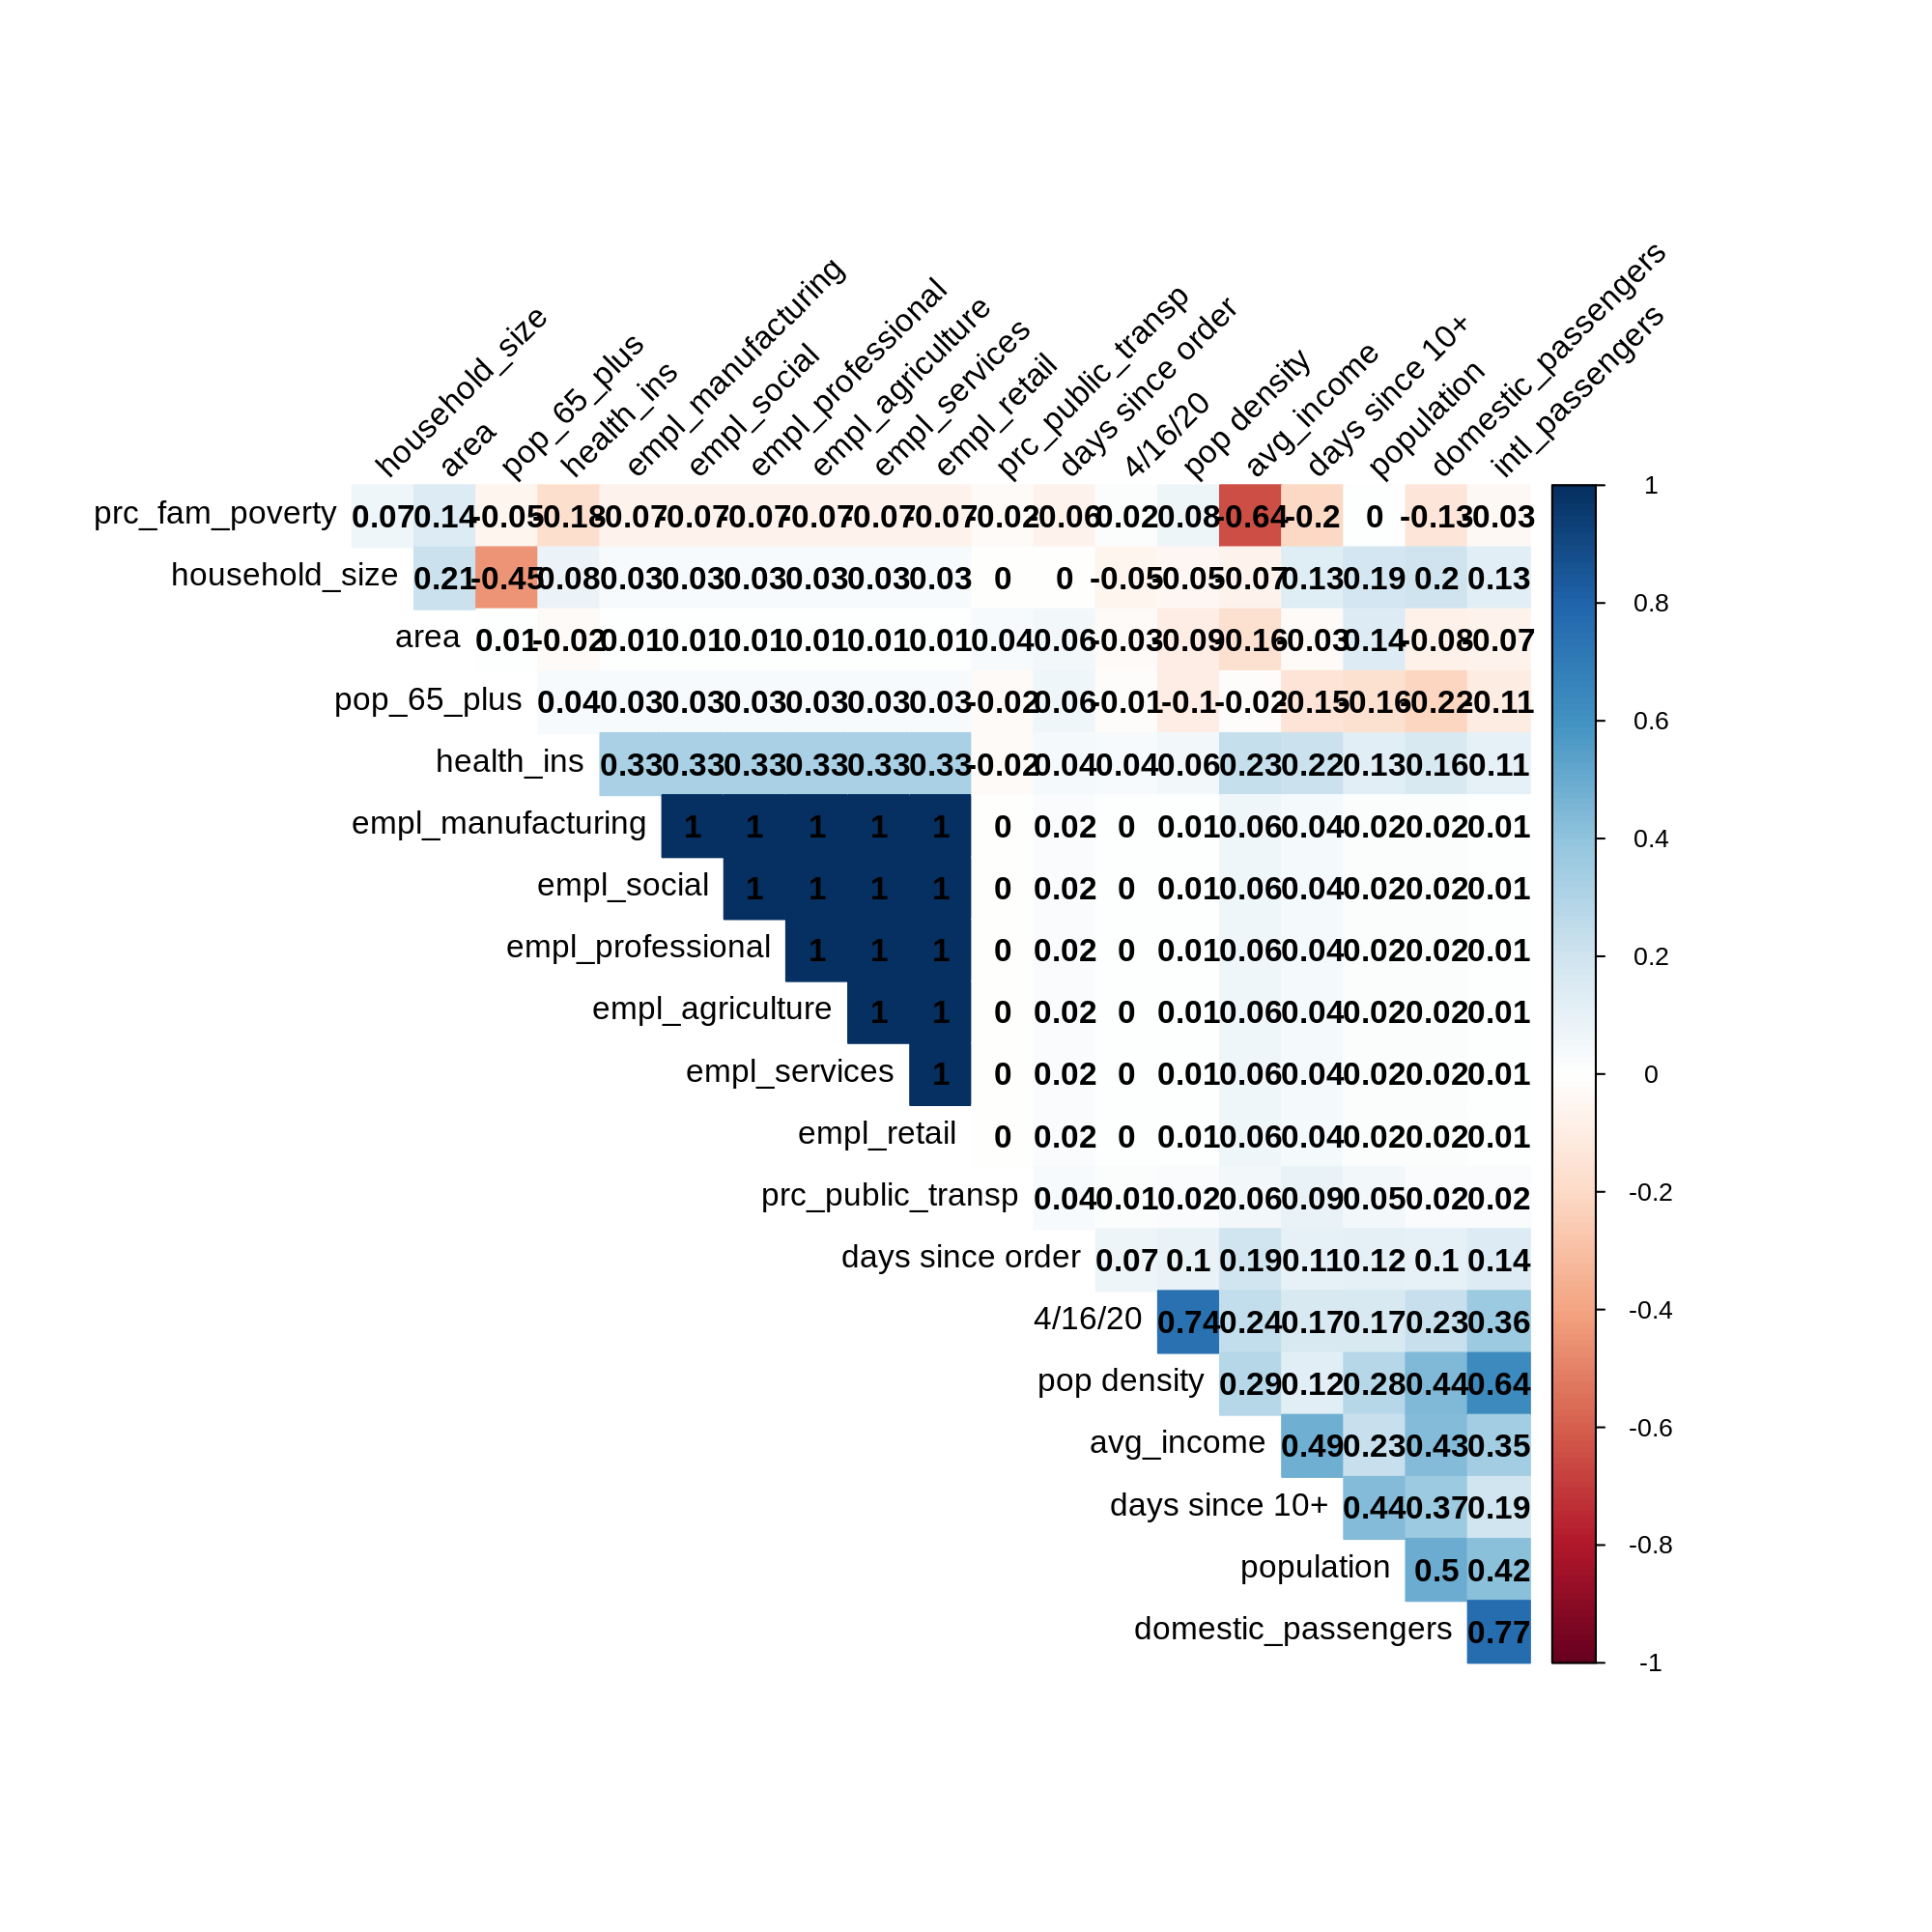

In [236]:
%%R -i abbrev -w 10 -h 10 --units in -r 200
library(corrplot)
corr = cor(abbrev[ c('household_size', 'empl_agriculture', 'empl_professional',
       'empl_social', 'empl_services', 'empl_manufacturing', 'empl_retail',
       'prc_fam_poverty', 'avg_income', 'prc_public_transp', 'population',
       'pop_65_plus', 'health_ins', 'area',
       'domestic_passengers', 'intl_passengers', '4/16/20', 'days since 10+',
       'days since order', 'pop density')])
corrplot(corr, method="color", type="upper", order="hclust", 
         addCoef.col = "black", # Add coefficient of correlation
         tl.col="black", tl.srt=45, #Text label color and rotation
         # hide correlation coefficient on the principal diagonal
         diag=FALSE 
         )

# looks like greatest correlation between # deaths on 4/16/20 is pop density, avg_income, days since 10+, population, domestic_passengers, and intl_passengers

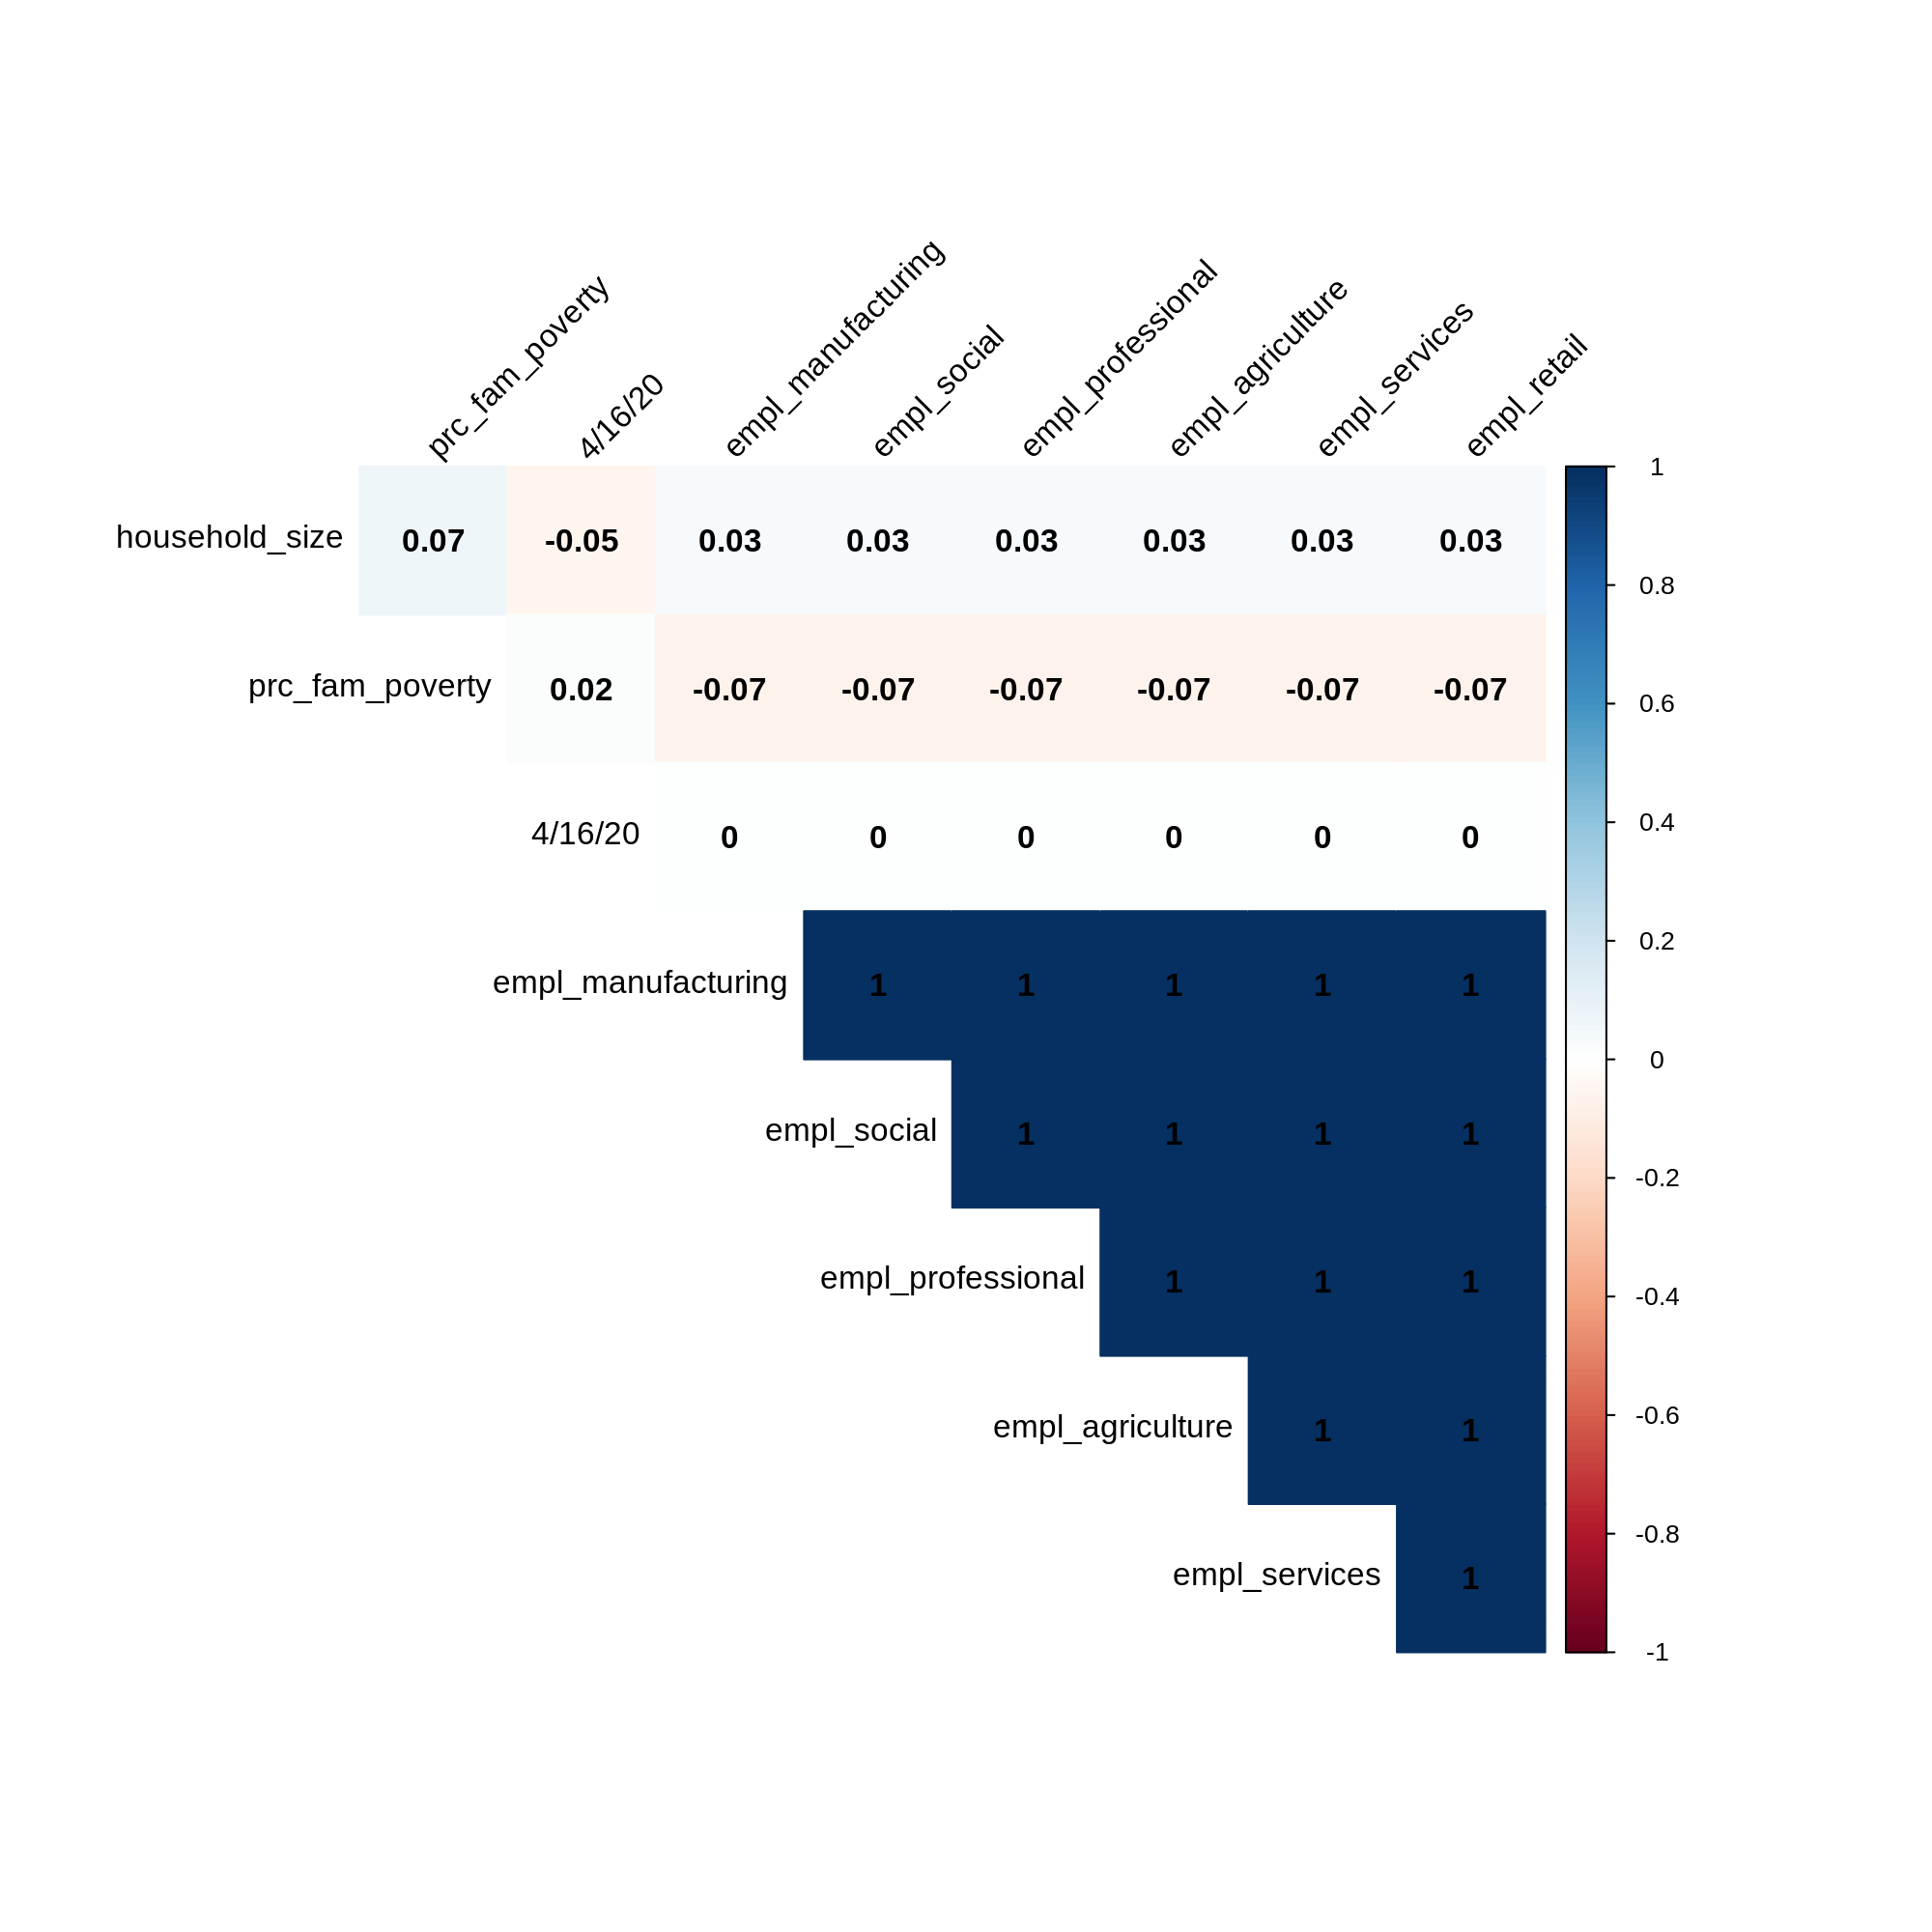

In [237]:
%%R -i abbrev -w 10 -h 10 --units in -r 200

corr = cor(abbrev[ c('household_size', 'empl_agriculture', 'empl_professional',
       'empl_social', 'empl_services', 'empl_manufacturing', 'empl_retail',
       'prc_fam_poverty', '4/16/20')])
corrplot(corr, method="color", type="upper", order="hclust", 
         addCoef.col = "black", tl.col="black", tl.srt=45,diag=FALSE )

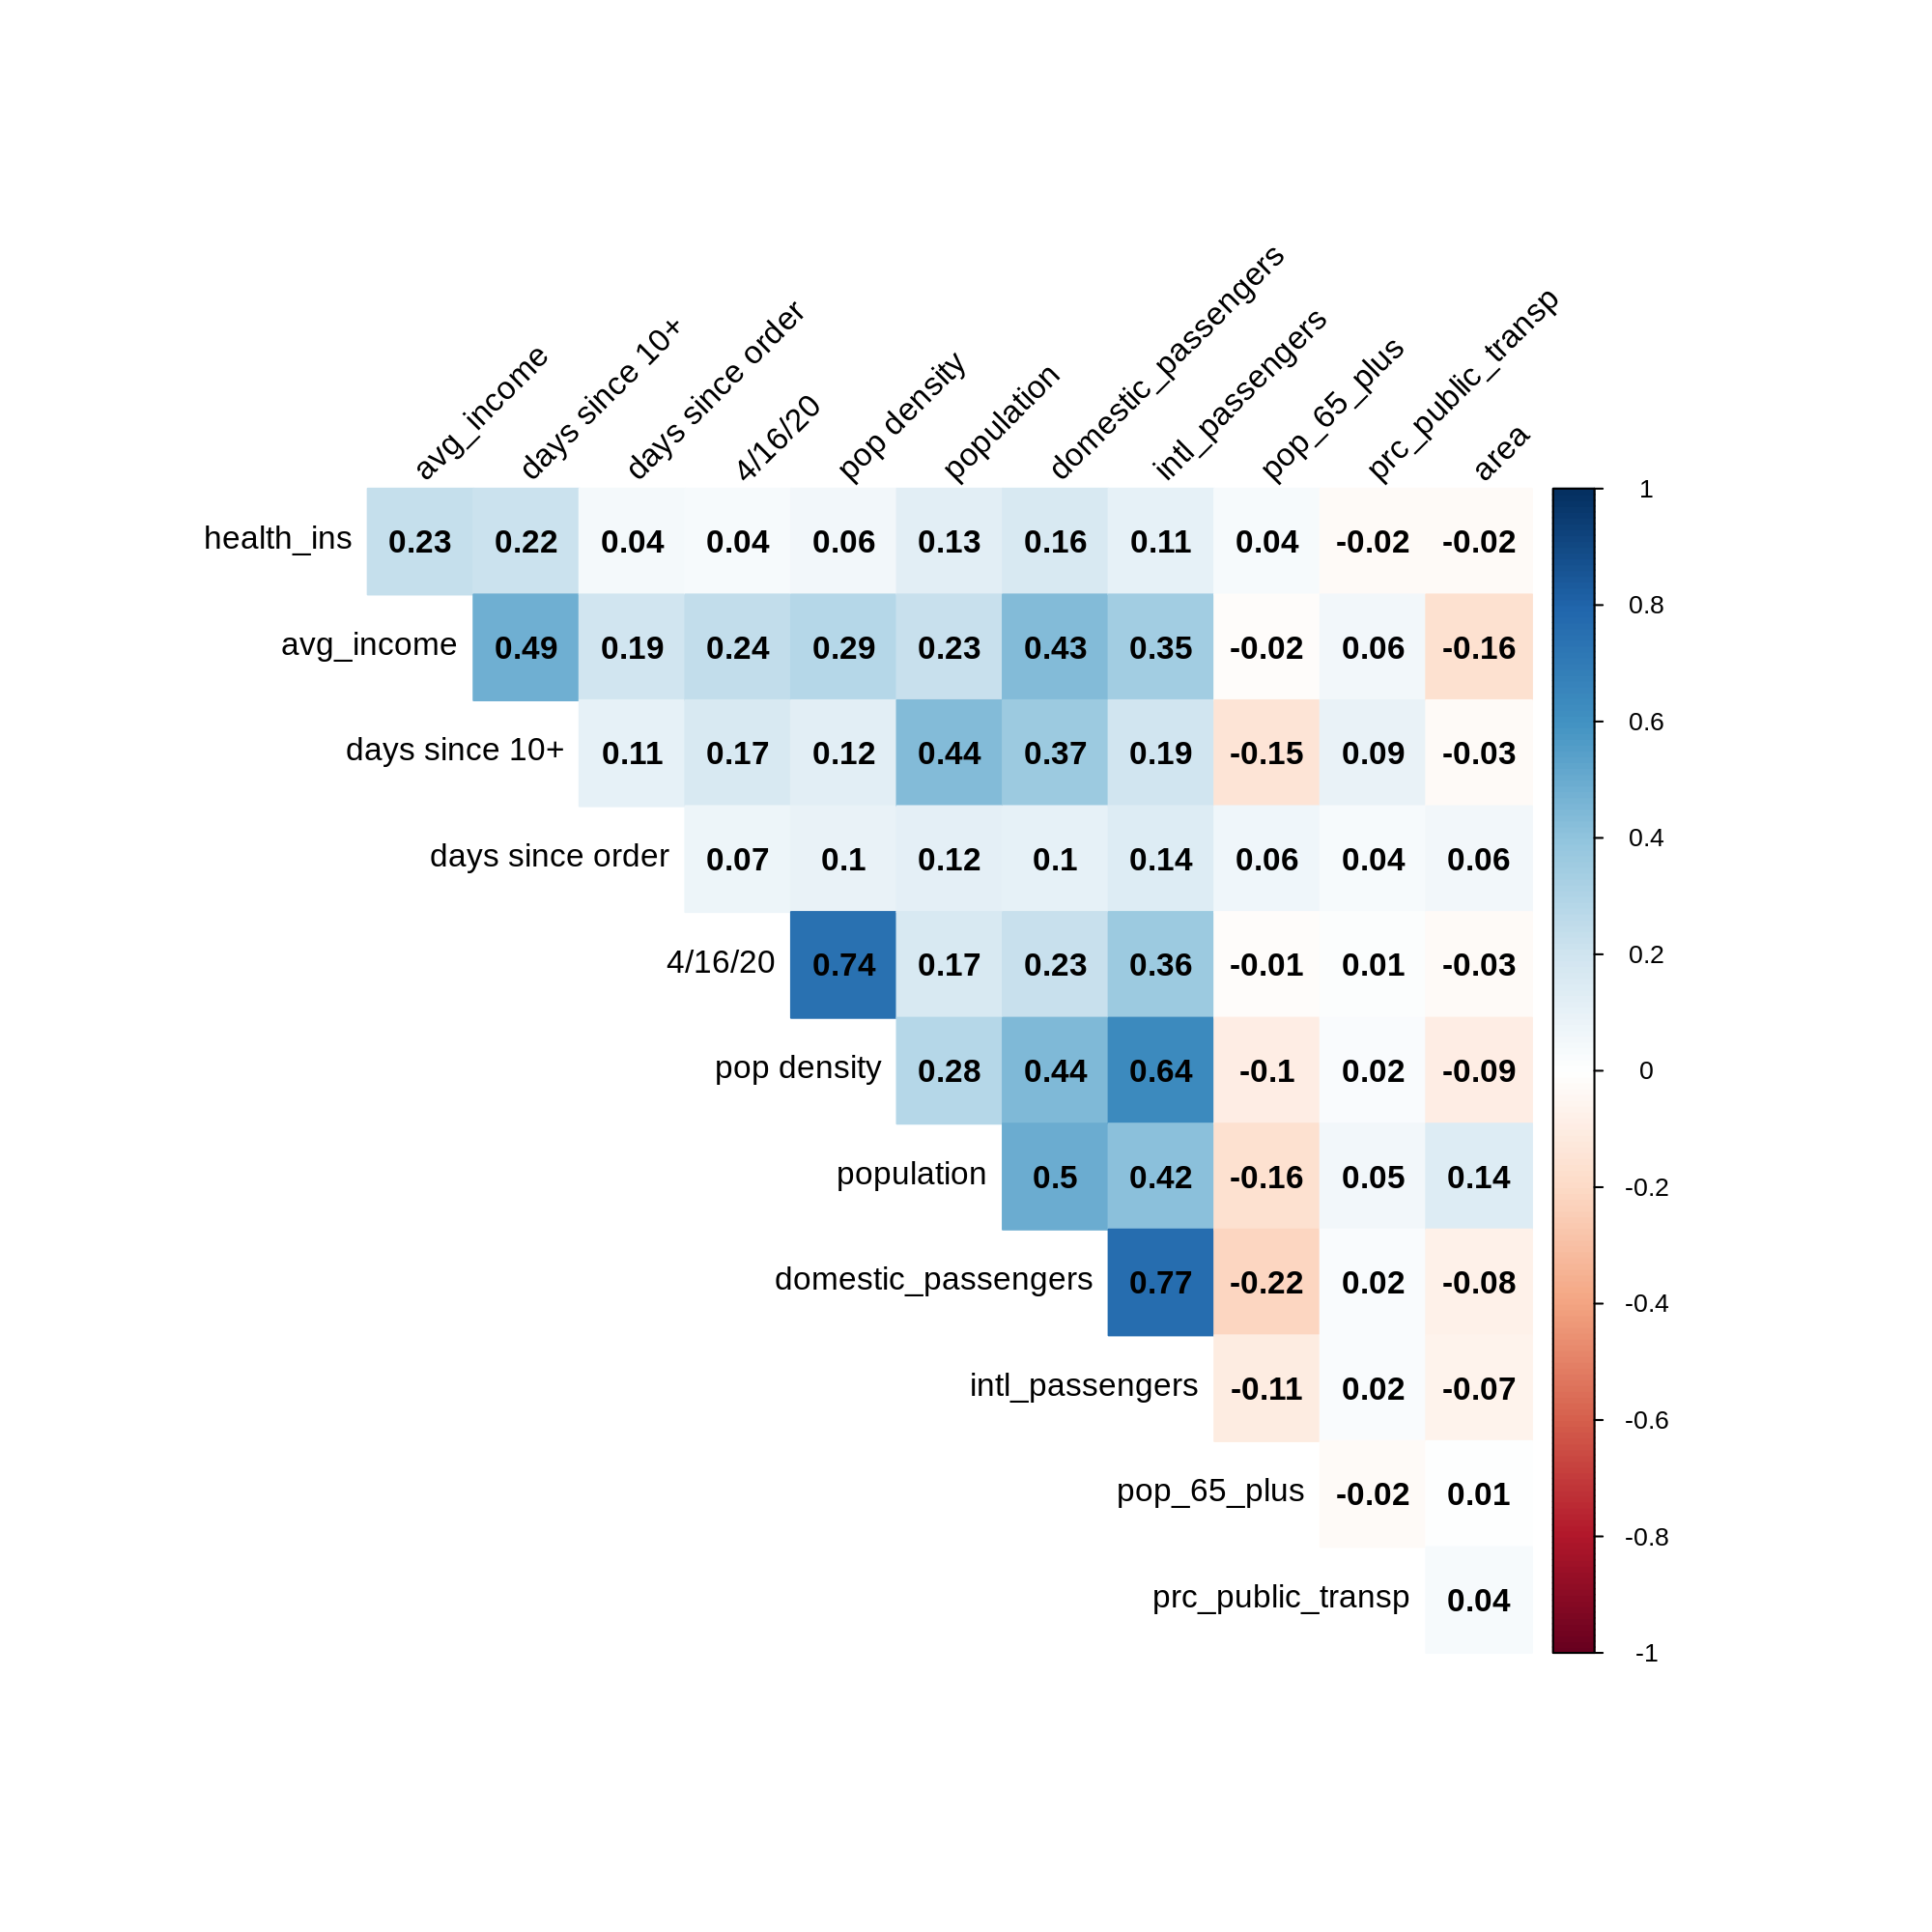

In [238]:
%%R -i abbrev -w 10 -h 10 --units in -r 200

corr = cor(abbrev[ c('avg_income', 'prc_public_transp', 'population','pop_65_plus', 'health_ins', 'area',
       'domestic_passengers', 'intl_passengers', '4/16/20', 'days since 10+','days since order', 'pop density')])
corrplot(corr, method="color", type="upper", order="hclust", 
         addCoef.col = "black", tl.col="black", tl.srt=45,diag=FALSE )

In [246]:
# rename columns in abbrev
abbrev.columns = ['household_size', 'empl_agriculture', 'empl_professional',
       'empl_social', 'empl_services', 'empl_manufacturing', 'empl_retail',
       'prc_fam_poverty', 'avg_income', 'prc_public_transp', 'population',
       'pop_65_plus', 'health_ins', 'county', 'state', 'area',
       'domestic_passengers', 'intl_passengers', "deaths", "ten_plus", "order", "density"]

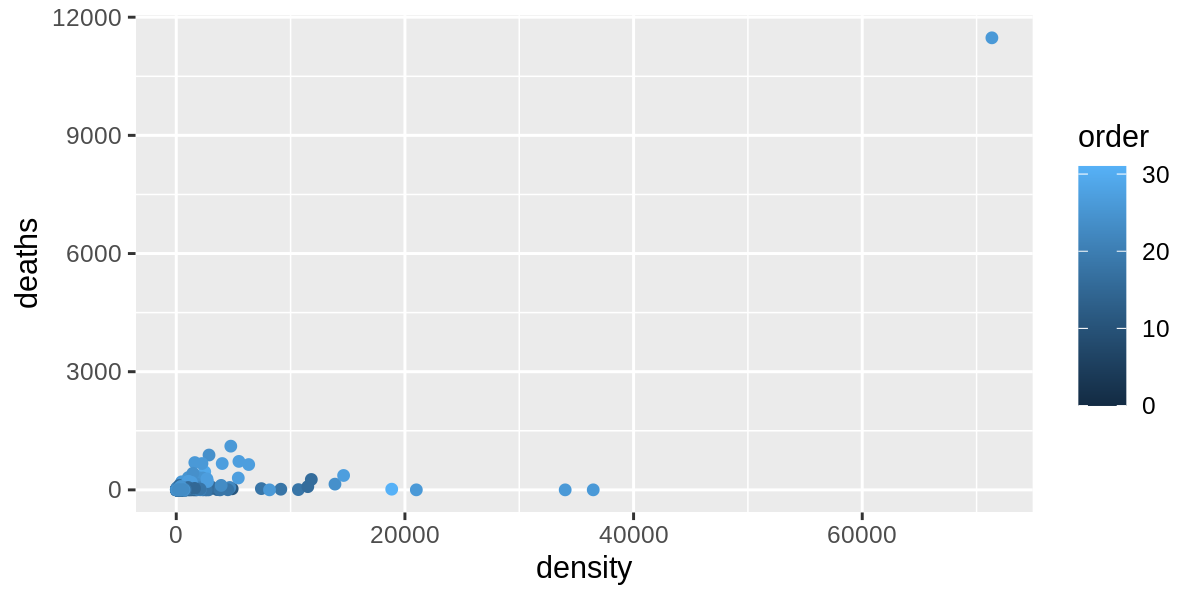

In [104]:
%%R -i abbrev -w 6 -h 3 --units in -r 200

ggplot(abbrev) + geom_jitter(aes(density, deaths, color=order))

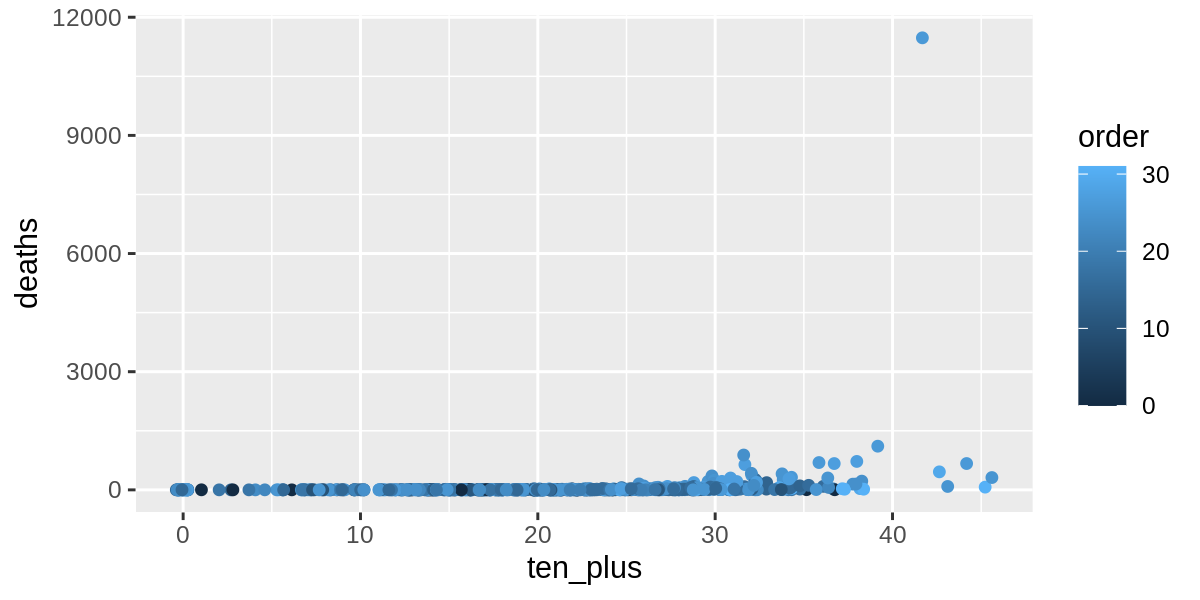

In [103]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev) + geom_jitter(aes(ten_plus, deaths, color=order))

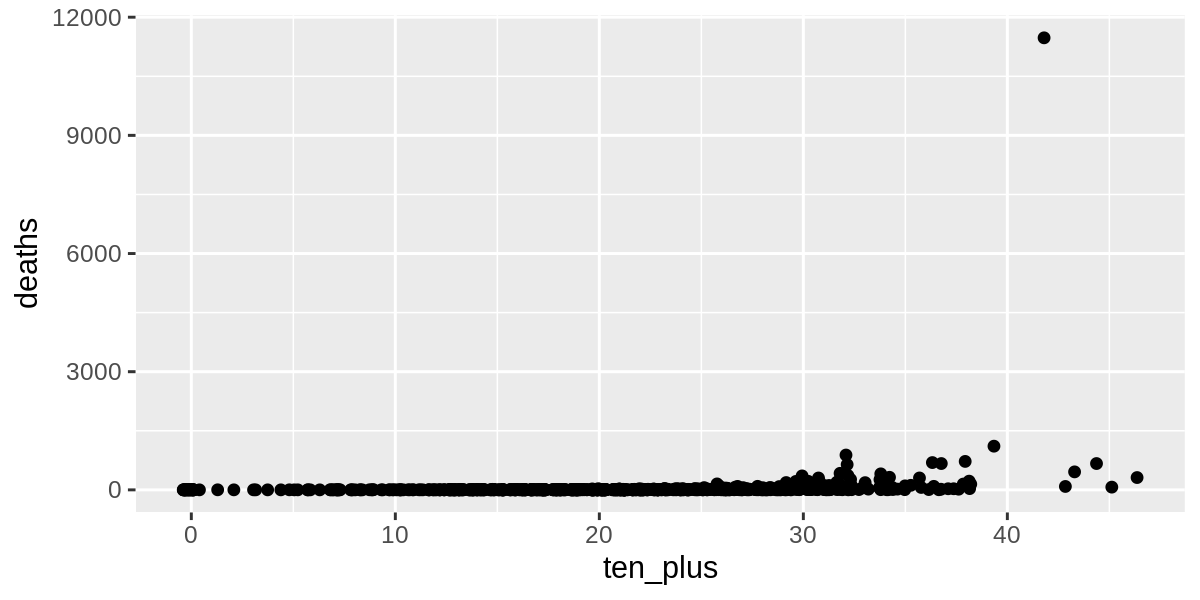

In [129]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev) + geom_jitter(aes(ten_plus, deaths))

In [135]:
abbrev[abbrev["deaths"] >= 9000]

,household_size,empl_agriculture,empl_professional,empl_social,empl_services,empl_manufacturing,empl_retail,prc_fam_poverty,avg_income,prc_public_transp,...,health_ins,county,state,area,domestic_passengers,intl_passengers,deaths,ten_plus,order,density
489,2.1,0.1,21.6,23.2,10.4,2.5,6.5,12.1,74911,59.9,...,99.3,New York County,NY,22.8,44647000,24424000,11477,42,26,71340.4


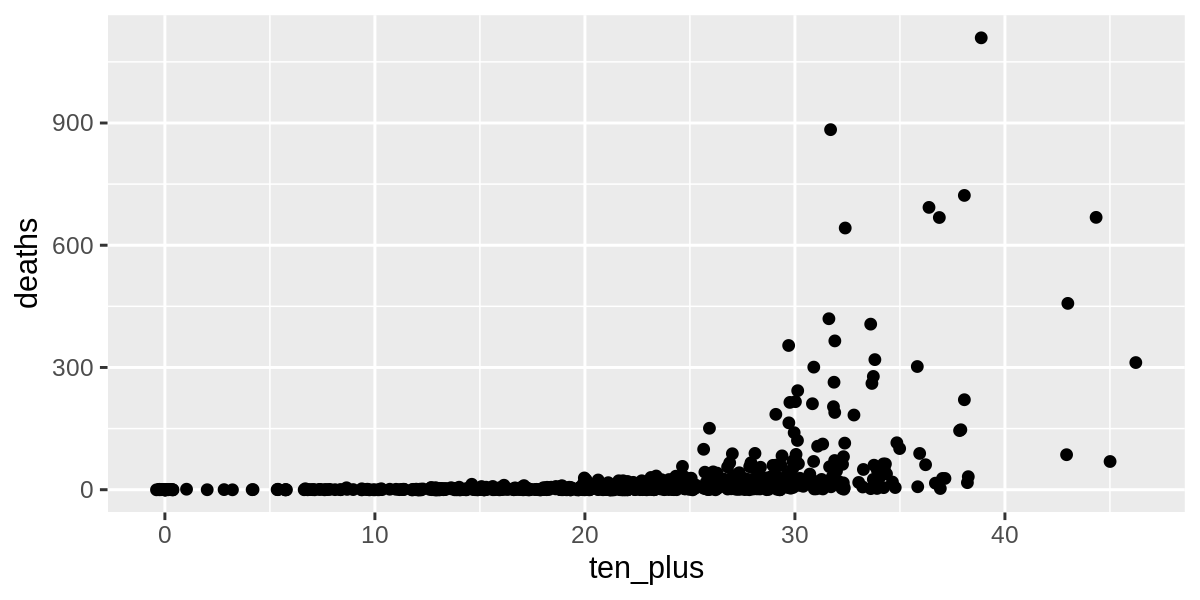

In [131]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev[which(abbrev$deaths < 9000),]) + geom_jitter(aes(ten_plus, deaths))
# looking more closely at data points that aren't NYC, it looks like deaths really start to vary/increase at 20 days or so after 10+ cases detected

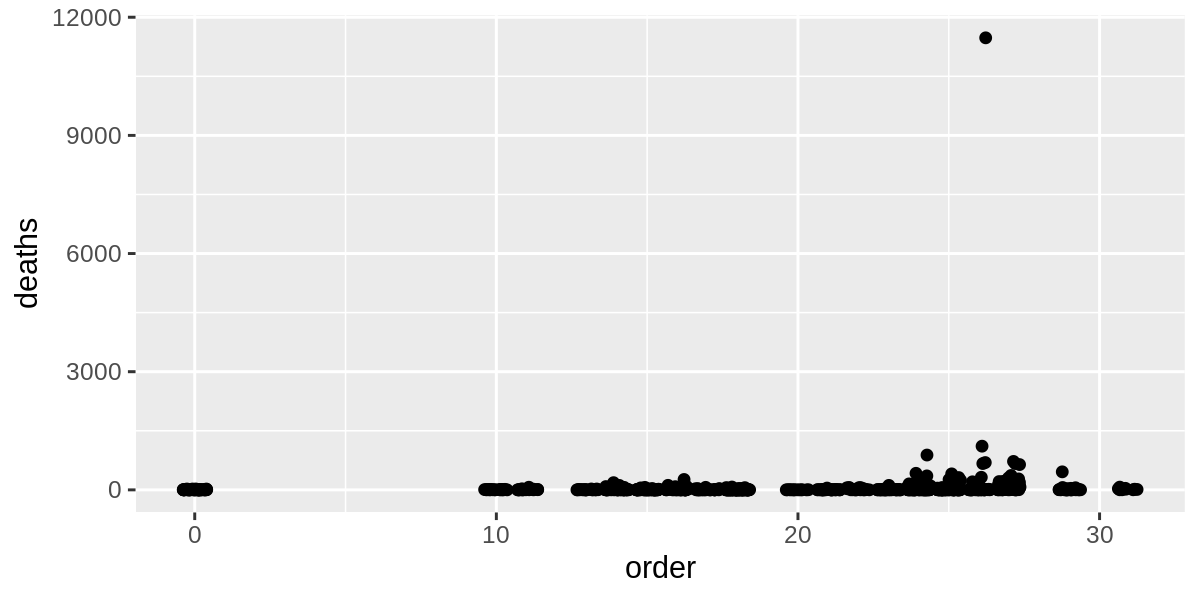

In [123]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev) + geom_jitter(aes(order, deaths))

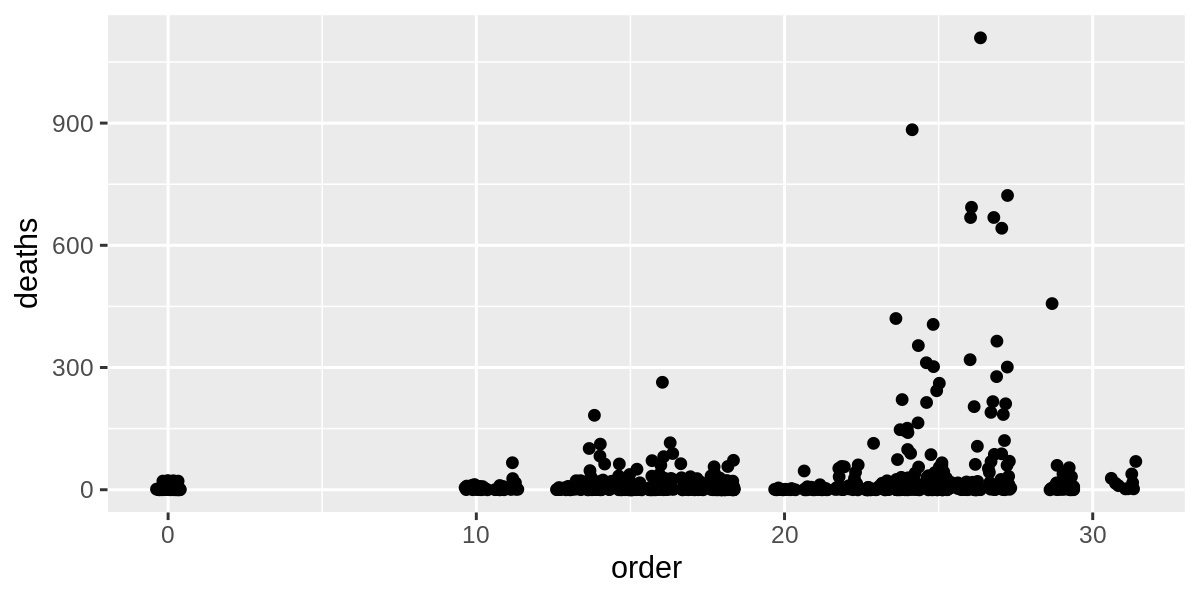

In [132]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev[which(abbrev$deaths < 9000),]) + geom_jitter(aes(order, deaths))

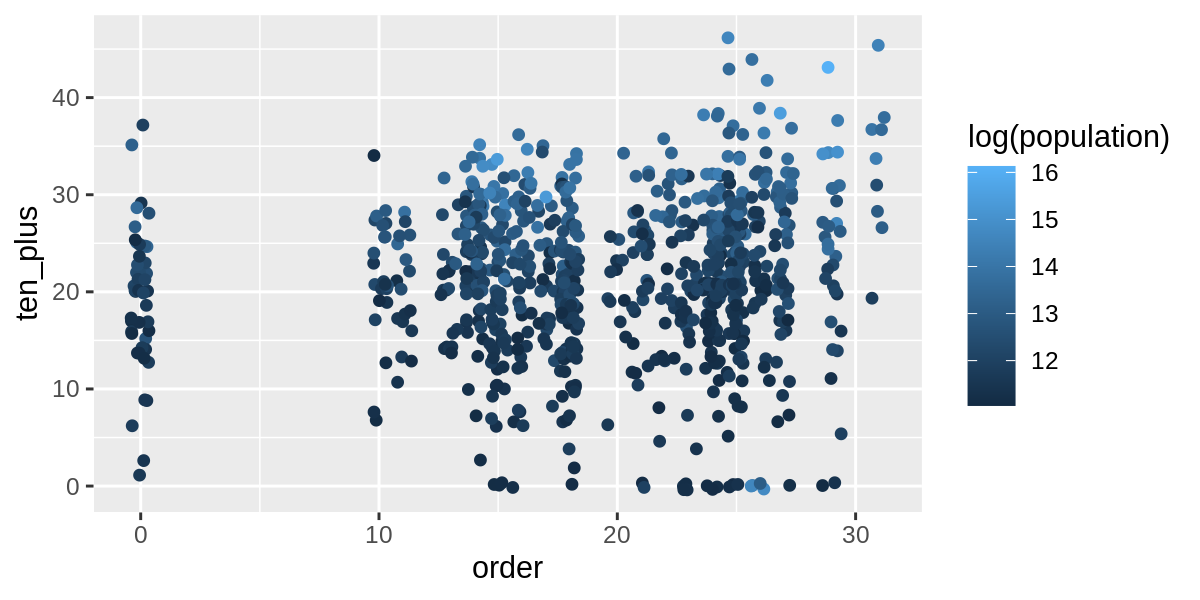

In [153]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev) + geom_jitter(aes(order, ten_plus, color=log(population)))

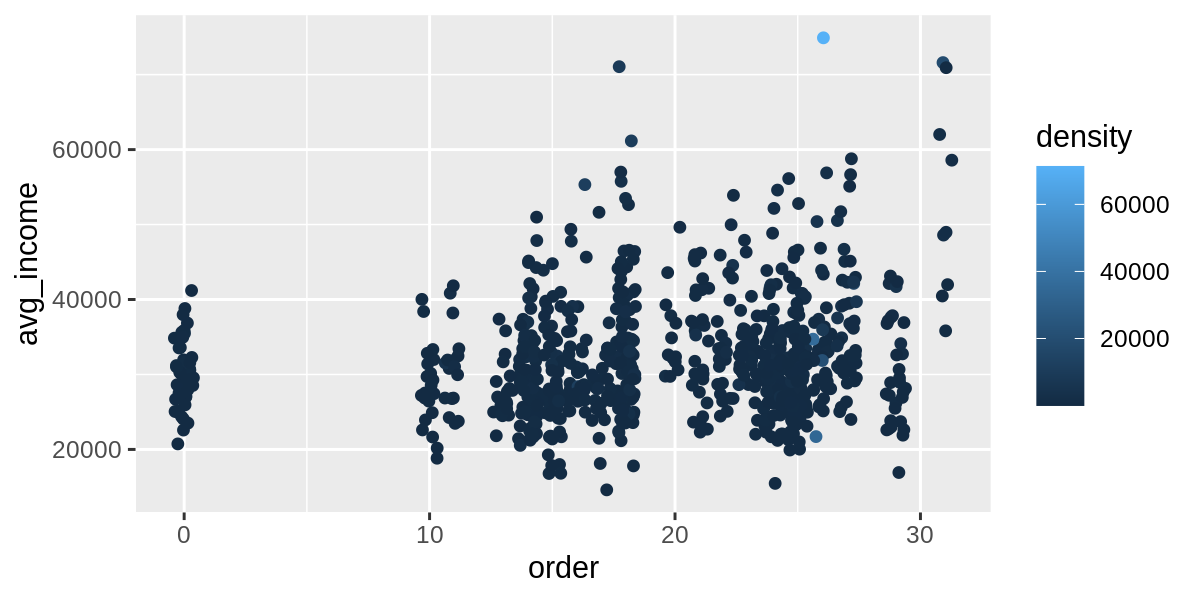

In [142]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev) + geom_jitter(aes(order, avg_income, color=density))

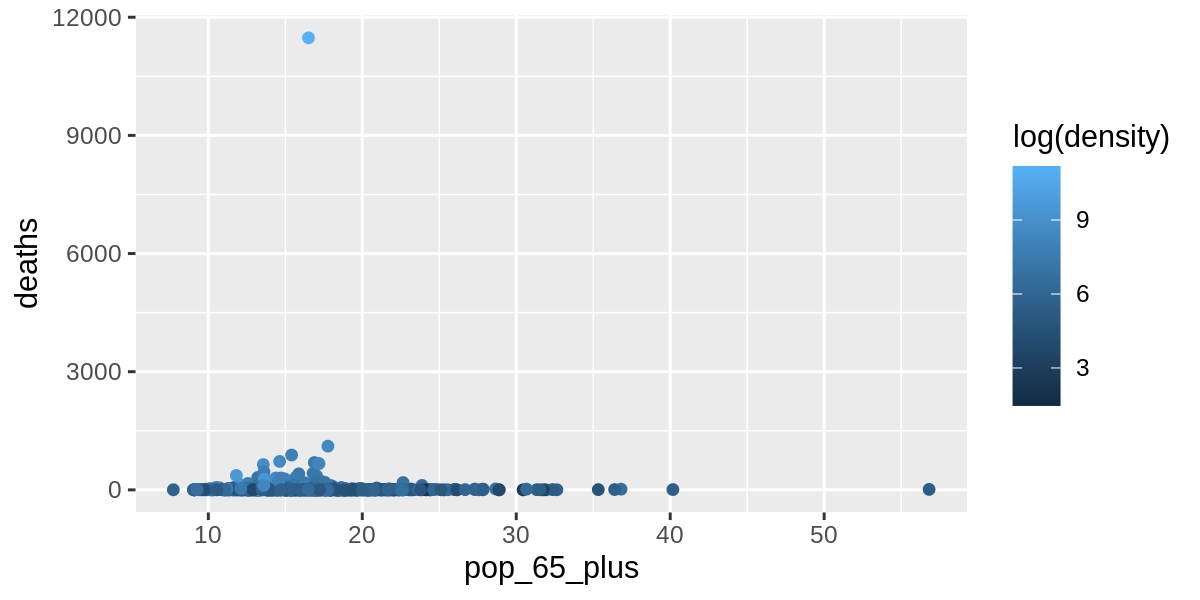

In [155]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev) + geom_jitter(aes(pop_65_plus, deaths, color=log(density)))

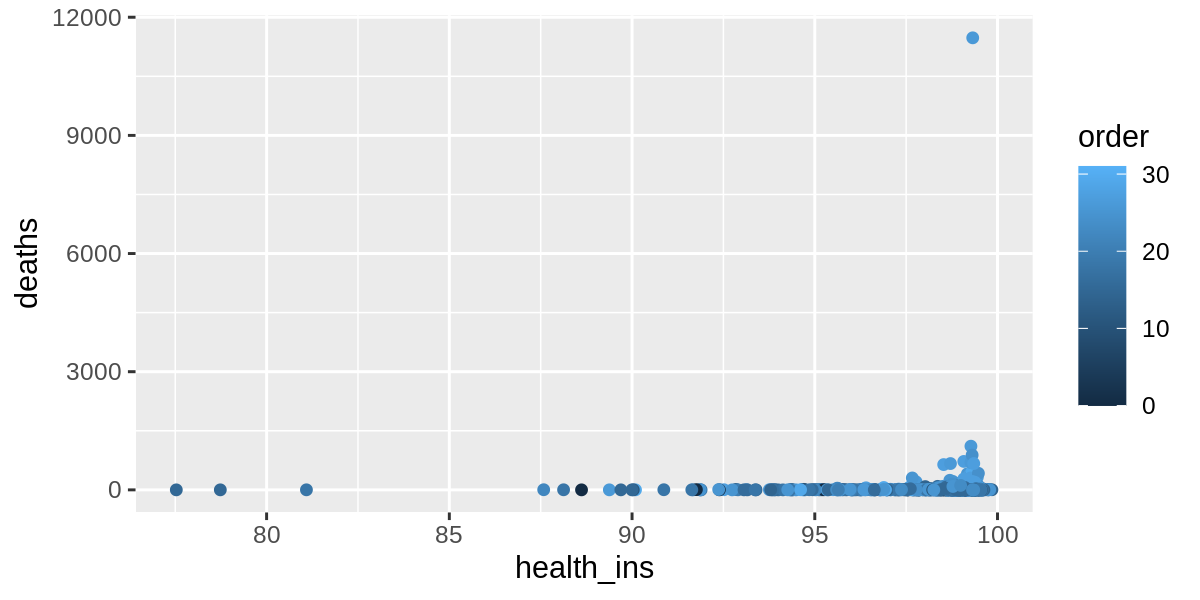

In [117]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev) + geom_jitter(aes(health_ins, deaths, color=order))

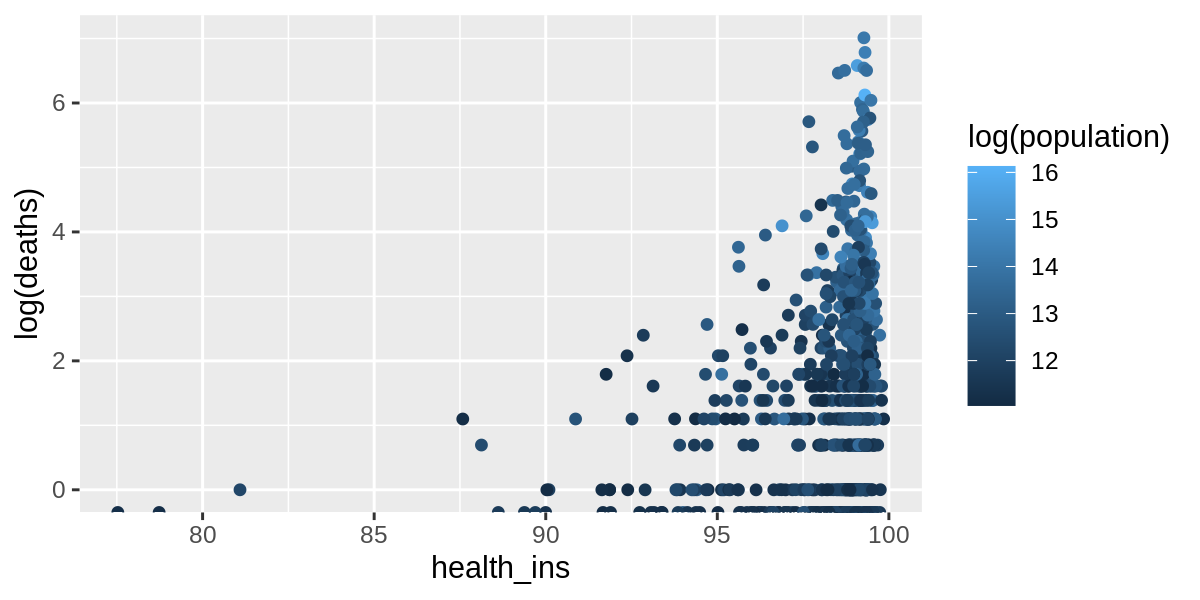

In [165]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev[which(abbrev$deaths < 9000),]) + geom_jitter(aes(health_ins, log(deaths), color=log(population)))

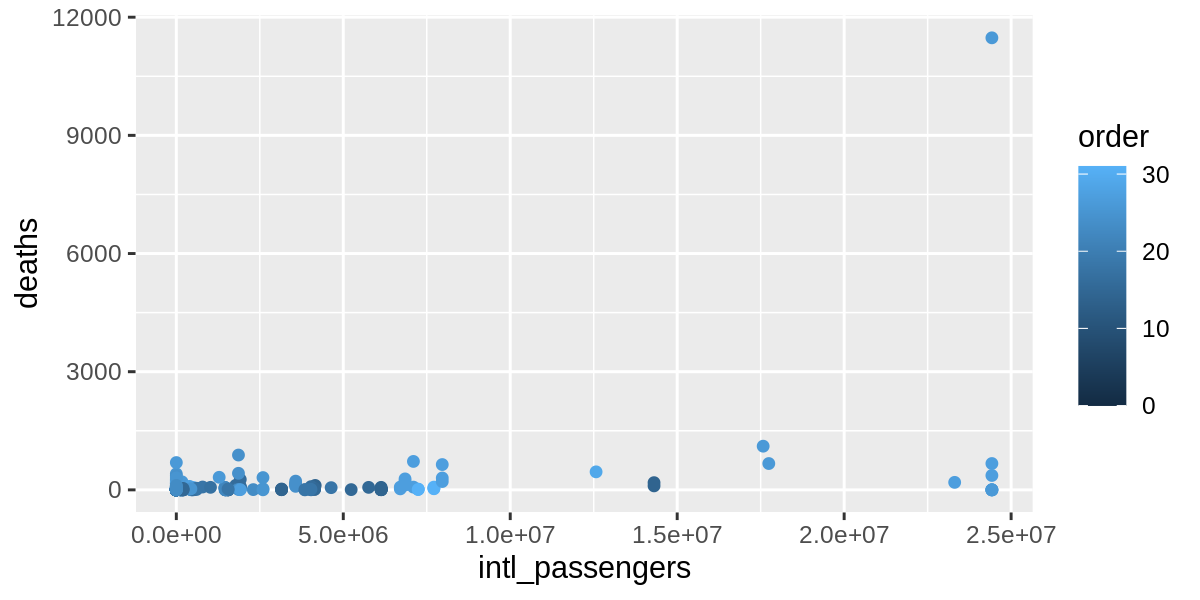

In [116]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev) + geom_jitter(aes(intl_passengers, deaths, color=order))

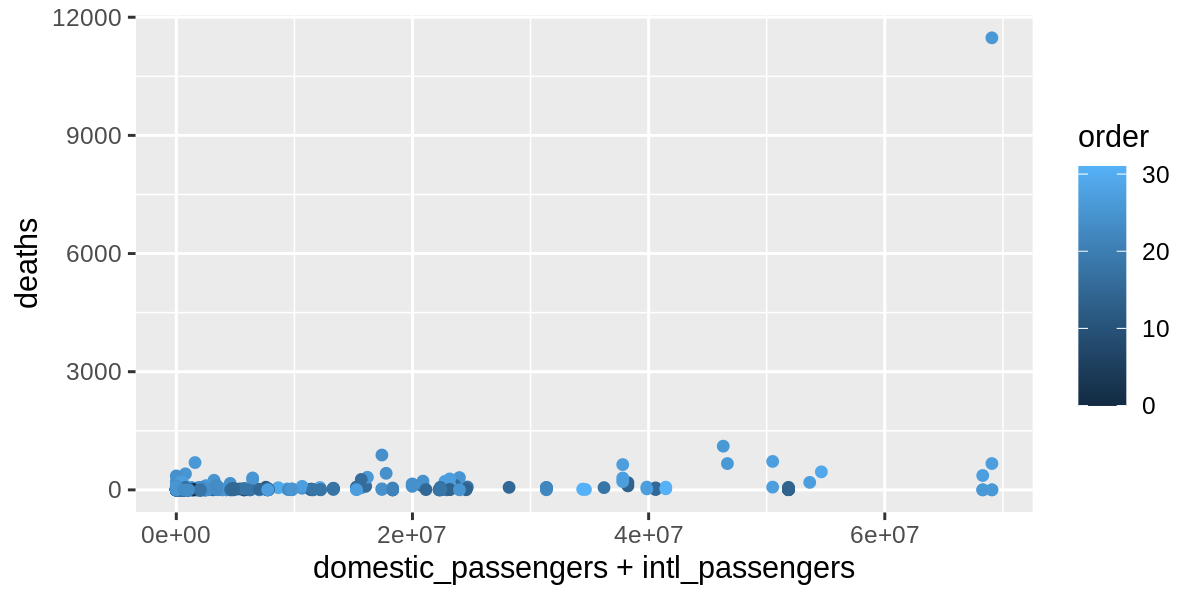

In [115]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev) + geom_jitter(aes(domestic_passengers+intl_passengers, deaths, color=order))

In [248]:
abbrev["death_prc"] = abbrev["deaths"]/abbrev["population"]

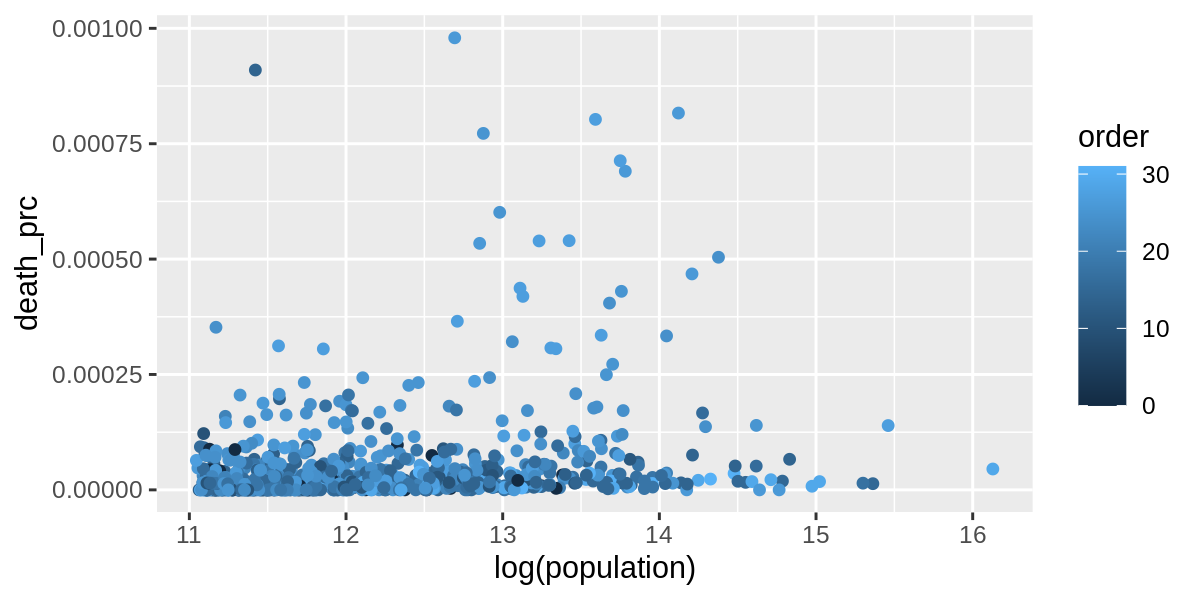

In [178]:
%%R -i abbrev -w 6 -h 3 --units in -r 200

ggplot(abbrev[which(abbrev$deaths < 9000),]) + geom_jitter(aes(log(population), death_prc, color=order))

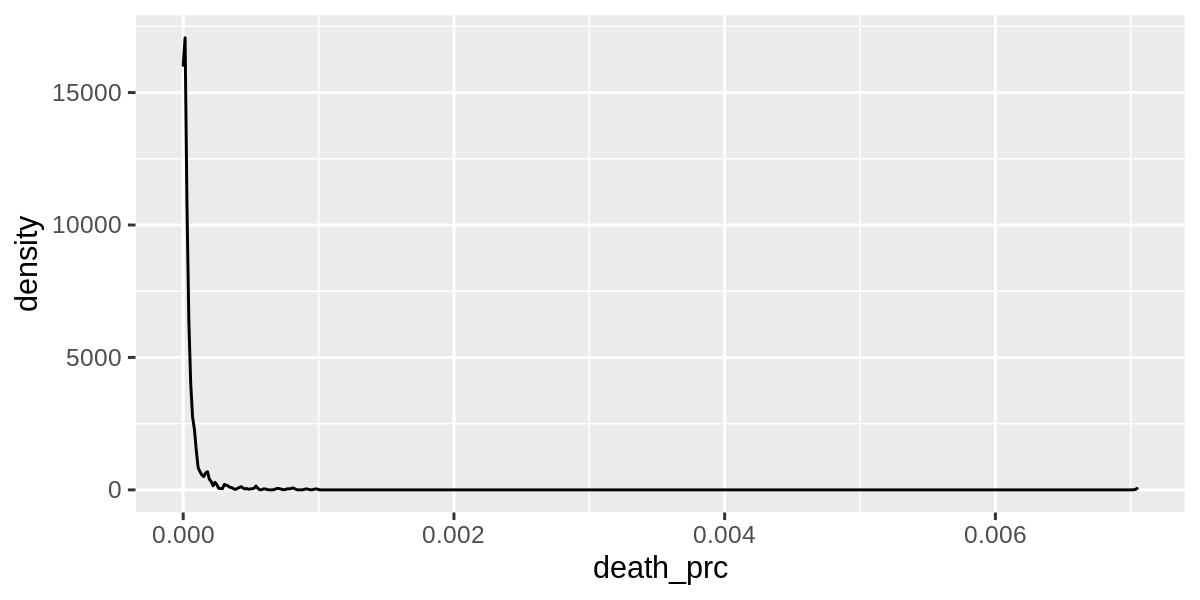

In [203]:
%%R -w 6 -h 3 --units in -r 200

# look at distribution of deaths as % of population?  
# any difference when the number of deaths (and assumption being # of infections) is lower in the population?
ggplot(abbrev, aes(death_prc)) + geom_density()

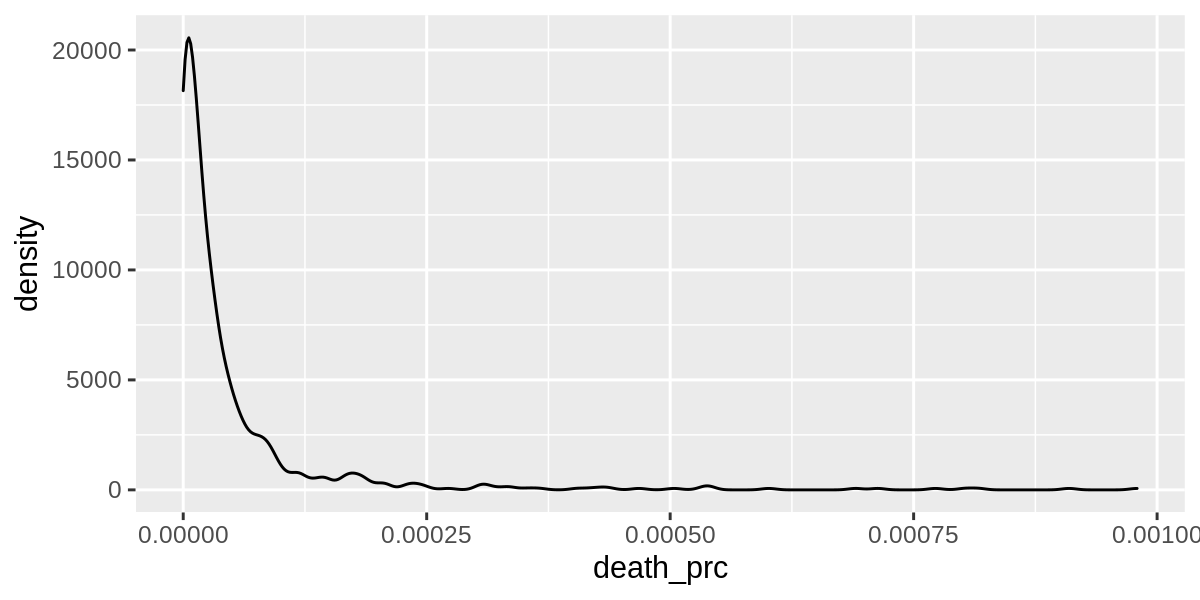

In [204]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev[which(abbrev$death_prc <0.001),], aes(death_prc)) + geom_density()
# vast majority of counties have a very low rate of covid19 deaths as percentage of their population

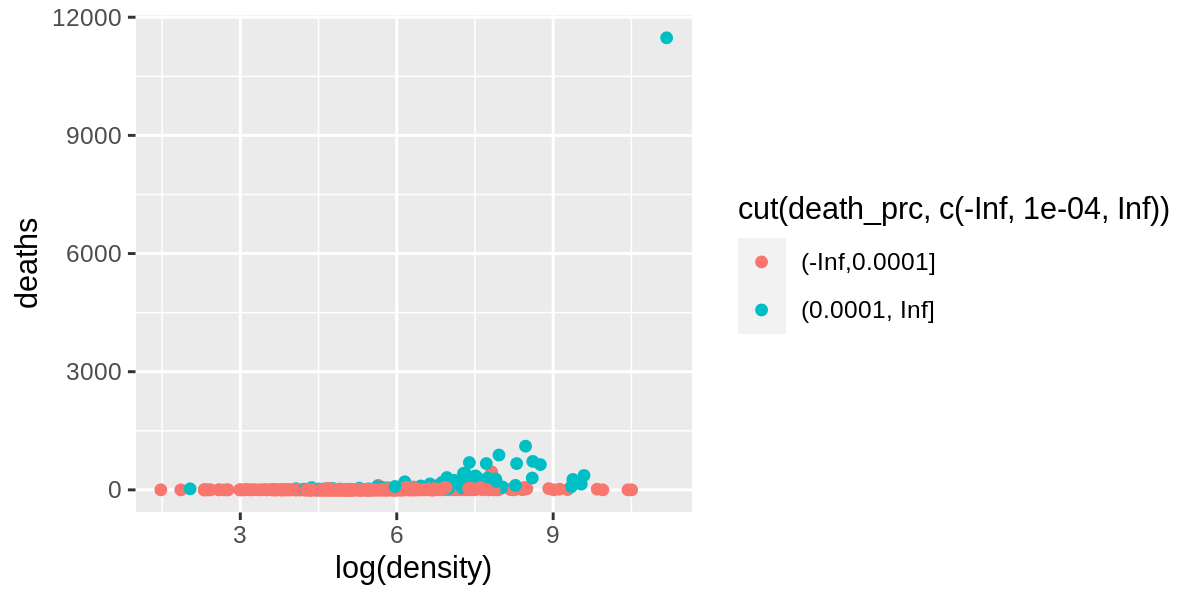

In [222]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev) + geom_jitter(aes(log(density), deaths, color=cut(death_prc, c(-Inf, 0.0001, Inf))))

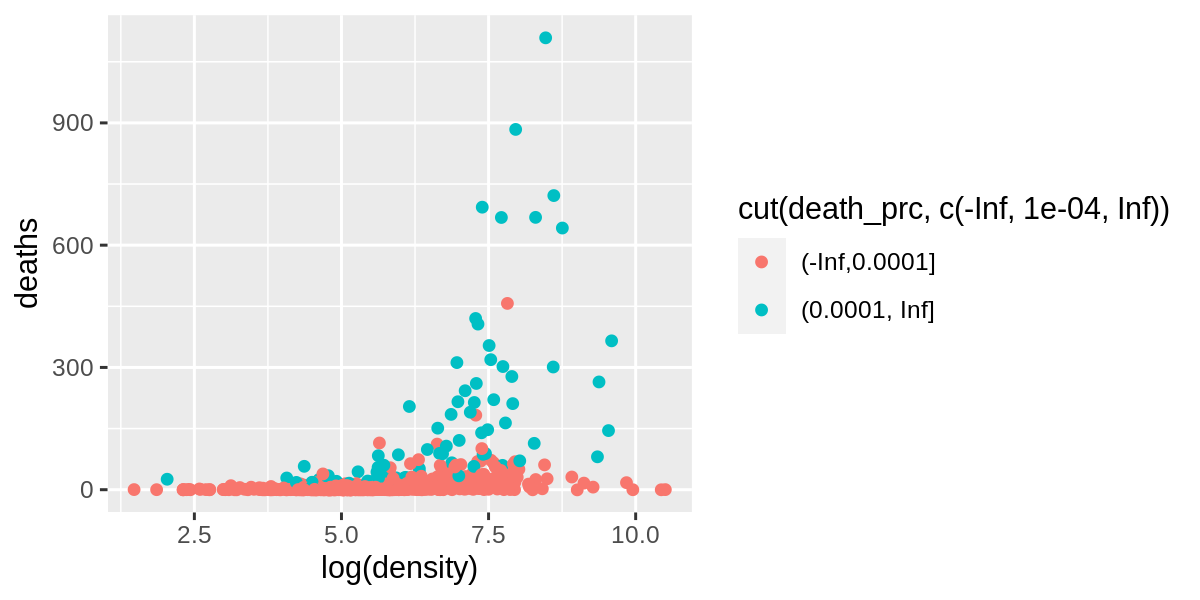

In [224]:
%%R -w 6 -h 3 --units in -r 200
# and without NYC
ggplot(abbrev[which(abbrev$deaths < 9000),]) + geom_jitter(aes(log(density), deaths, 
                                                               color=cut(death_prc, c(-Inf, 0.0001, Inf))))

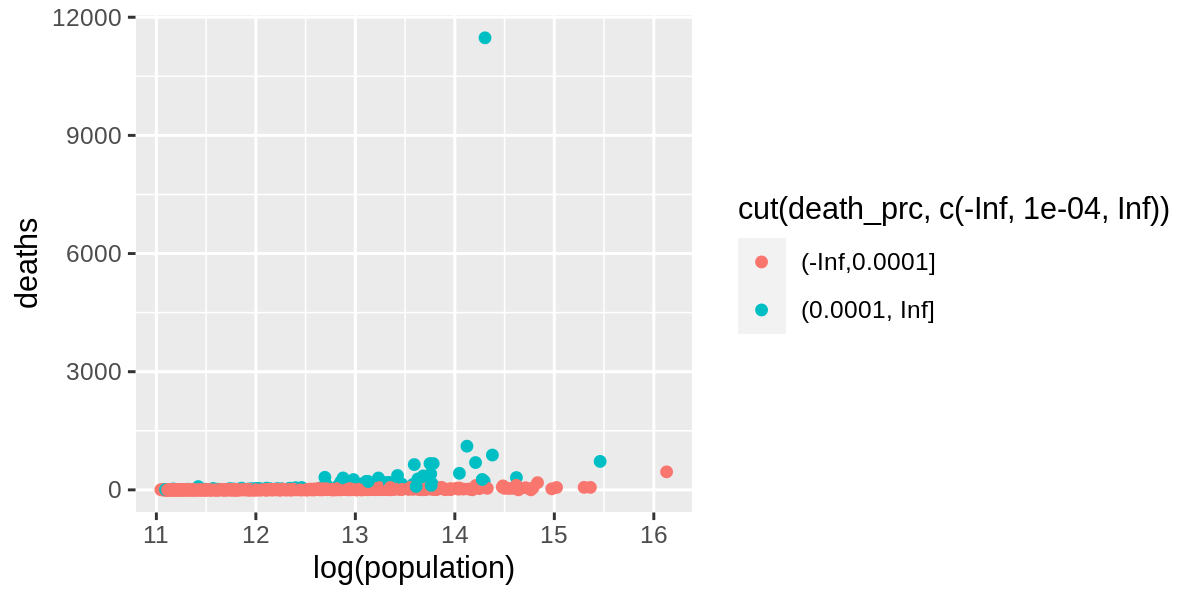

In [227]:
%%R -w 6 -h 3 --units in -r 200

# without NYC
ggplot(abbrev) + geom_jitter(aes(log(population), deaths, color=cut(death_prc, c(-Inf, 0.0001, Inf))))
# note color here is dependent on both the x and y axes, so the clarity of the pattern is confirmative, not informative

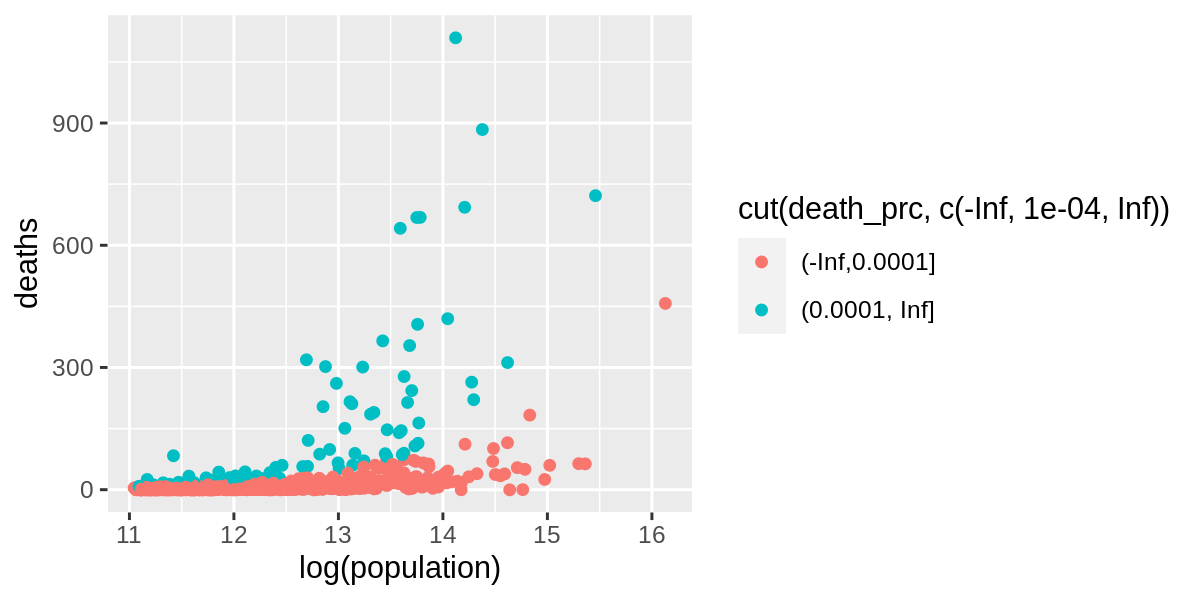

In [225]:
%%R -w 6 -h 3 --units in -r 200

# without NYC
ggplot(abbrev[which(abbrev$deaths < 9000),]) + geom_jitter(aes(log(population), deaths, 
                                                               color=cut(death_prc, c(-Inf, 0.0001, Inf))))
# note color here is dependent on both the x and y axes, so the clarity of the pattern is confirmative, not informative

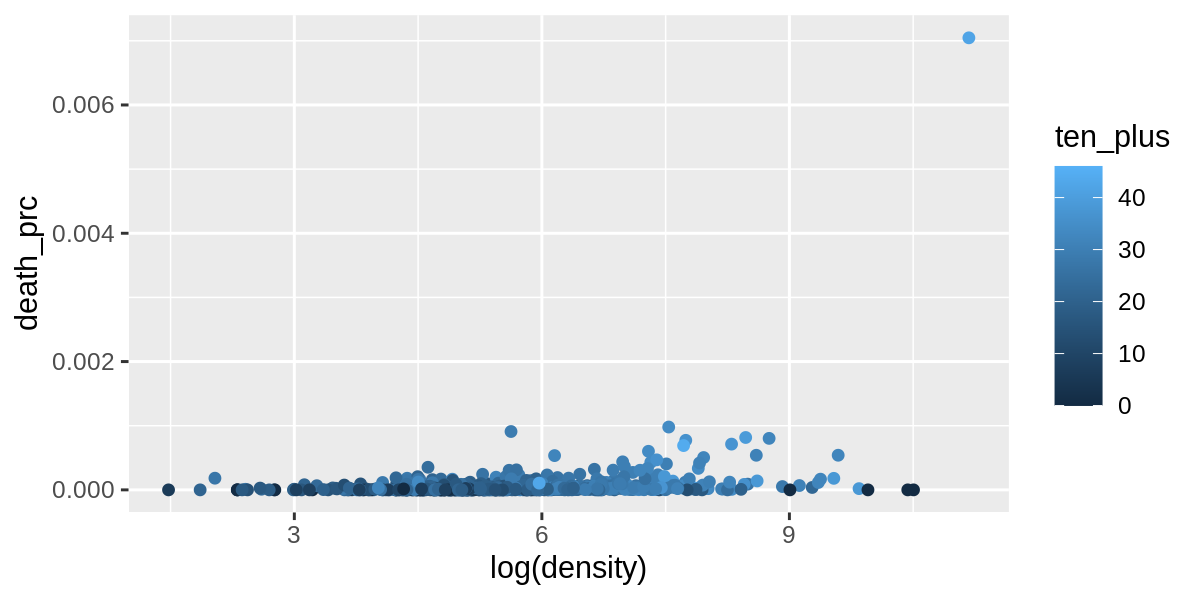

In [250]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev) + geom_jitter(aes(log(density), death_prc, color=ten_plus))

In [260]:
abbrev[(abbrev["ten_plus"] < 20) & (np.log(abbrev["density"]) > 8)]

,household_size,empl_agriculture,empl_professional,empl_social,empl_services,empl_manufacturing,empl_retail,prc_fam_poverty,avg_income,prc_public_transp,...,county,state,area,domestic_passengers,intl_passengers,deaths,ten_plus,order,density,death_prc
284,2.7,1.6e-01,9.2,32.4,11.8,3.3,11.2,24.3,21712,58.4,...,Bronx County,NY,42.1,44647000,24424000,0,0,26,34017.4,0.0
588,2.6,7.6e-02,14.8,28.0,10.2,3.1,8.7,15.4,34709,60.7,...,Kings County,NY,70.8,43872000,24424000,0,0,26,36470.3,0.0
688,2.9,3.1e-02,11.6,24.2,11.7,3.2,9.4,9.1,31866,51.4,...,Queens County,NY,108.5,44647000,24424000,0,0,26,20997.9,0.0
689,2.8,6.1e-02,11.6,29.5,6.9,2.7,9.4,8.9,35966,29.6,...,Richmond County,NY,58.4,43872000,24424000,0,0,26,8157.9,0.0


In [261]:
abbrev[(abbrev["death_prc"] < 0.001) & (np.log(abbrev["density"]) > 8)]
# all of these have an airport within 20 miles getting at least domestic passengers (most also intl.)
# 

,household_size,empl_agriculture,empl_professional,empl_social,empl_services,empl_manufacturing,empl_retail,prc_fam_poverty,avg_income,prc_public_transp,...,county,state,area,domestic_passengers,intl_passengers,deaths,ten_plus,order,density,death_prc
37,2.4,8.1e-02,16.8,30.6,10.3,4.9,8.7,11.8,41657,31.4,...,Suffolk County,MA,58.1,16407000,3572800,145,38,24,13882.2,1.8e-04
59,2.5,1.1e-01,16.8,18.2,9.5,6.3,10.4,11.6,42150,43.9,...,Hudson County,NJ,46.2,43872000,24424000,365,32,27,14636.5,5.4e-04
91,2.8,7.2e-01,14.5,17.2,9.4,8.4,10.6,10.8,32467,2.5,...,Dallas County,TX,871.3,36450000,4138700,50,33,15,3027.5,1.9e-05
154,2.4,3.2e-01,12.7,30.7,9.2,4.5,8.8,13.9,31433,16.2,...,Baltimore city,MD,80.9,12695000,604300,31,28,18,7443.7,5.1e-05
165,2.0,3.2e-01,13.1,29.4,12.3,8.2,7.9,17.0,31537,10.1,...,St. Louis city,MO,61.9,7451000,136100,27,26,11,4891.6,8.9e-05
169,2.7,3.2e-01,14.5,25.0,7.6,7.0,9.1,12.2,39708,21.0,...,Essex County,NJ,126.2,29843000,7964100,642,32,27,6336.8,8.0e-04
215,2.2,2.9e-02,23.4,16.7,9.6,3.3,6.2,9.9,61158,18.7,...,Alexandria city,VA,15.0,18891000,4032700,6,22,18,10680.6,3.7e-05
237,3.0,6.5e-01,14.7,19.2,11.1,11.6,10.5,7.3,41722,2.1,...,Orange County,CA,790.6,9373000,0,25,34,29,4030.0,7.8e-06
273,2.6,5.0e-01,11.1,28.2,9.5,11.7,9.8,9.8,35257,6.3,...,Ramsey County,MN,152.2,16845000,1477300,7,32,21,3614.8,1.3e-05
284,2.7,1.6e-01,9.2,32.4,11.8,3.3,11.2,24.3,21712,58.4,...,Bronx County,NY,42.1,44647000,24424000,0,0,26,34017.4,0.0e+00


In [ ]:
%%R -w 6 -h 3 --units in -r 200

ggplot(abbrev) + geom_jitter(aes(log(density), death_prc, color=ten_plus))

In [ ]:
#c('avg_income', 'prc_public_transp', 'population','pop_65_plus', 'health_ins', 'area',
 #      'domestic_passengers', 'intl_passengers', '4/16/20', 'days since 10+','days since order', 'pop density')

In [197]:
abbrev.to_csv("data/abbrev.csv")